# Df prep

In [1]:

# region wise analysis imports
import folium
from folium.plugins import MarkerCluster

# sklearn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

# topic analysis imports and word cloud imports
import pandas as pd 


import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


# sns plots

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# network visualization

from itertools import combinations
import networkx as nx
from nxviz import CircosPlot

# imports for survey analyses

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import datetime

import pytz

import ast

# detailed summaries

import sweetviz as sv

mcr_df = pd.read_csv("./data/iGLAS-LE For Mrinal - value names.csv", low_memory=False)
metadata = pd.read_csv("./metadata.csv", sep=':', low_memory=False)
col_dg = ['Progress', 'UserLanguage', 'Collection']
col_all = metadata['Variable']
# annotation dataframe
mcr_df_ann = mcr_df[mcr_df.columns & col_dg]
# all variable
mcr_df_all = mcr_df[mcr_df.columns & col_all]
# all annotated
mcr_df_all_n = pd.concat([mcr_df_ann, mcr_df_all], axis=1)
mcr_df_all_n["id"] = mcr_df_all_n.index
ncol_dg = ['id', 'Progress', 'UserLanguage', 'Collection']
dfx = pd.melt(mcr_df_all_n, id_vars=list(ncol_dg))
dfx["Variable"] = dfx["variable"]
del dfx["variable"]
t_all = pd.merge(dfx, metadata, on='Variable')
values_t_all = t_all
mcr_df = pd.read_csv("./data/iGLAS-LE.csv", low_memory=False)
# all variable
mcr_df_all = mcr_df[mcr_df.columns & col_all]
# all annotated
mcr_df_all_n = pd.concat([mcr_df_ann, mcr_df_all], axis=1)
mcr_df_all_n["id"] = mcr_df_all_n.index
ncol_dg = ['id', 'Progress', 'UserLanguage', 'Collection']
dfx = pd.melt(mcr_df_all_n, id_vars=list(ncol_dg))
dfx["Variable"] = dfx["variable"]
del dfx["variable"]
dfx = dfx[dfx['UserLanguage'] == 'RU']
t_all = pd.merge(dfx, metadata, on='Variable')
codes_t_all = t_all
# all composites
gr_df = codes_t_all
comp_df = gr_df
#filter all empty strings from values
comp_df["value"] = comp_df["value"].map(str)
filter = comp_df["value"] != ' '
ndf = comp_df[filter]
filter = ndf["Composite"] == 'Yes'
new_df = ndf[filter]
new_df['Group'].unique()
# delete datframe rows that do not contain a number string
new_df = new_df[new_df['value'].apply(lambda x: str(x).isdigit())]
new_df['value'].unique()
ndf = new_df
###########################################333333333333333333333333333 filter for RU participants
ndf = ndf[ndf['UserLanguage']=='RU']

### 37
filter = ndf["Group"] == 37
ndf_37 = ndf[filter]
ndf_37['value'].replace('1','Not applicable',inplace=True)
ndf_37['value'].replace('2','Charity sector',inplace=True)
ndf_37['value'].replace('3','Construction and maintenance',inplace=True)
ndf_37['value'].replace('4','Education',inplace=True)
ndf_37['value'].replace('5','Engineering Computing and ICT',inplace=True)
ndf_37['value'].replace('6','Communication Advertising and Marketing',inplace=True)
ndf_37['value'].replace('7','Farming and agricultural',inplace=True)
ndf_37['value'].replace('17','Genetics',inplace=True)
ndf_37['value'].replace('8','Governmental employee',inplace=True)
ndf_37['value'].replace('9','Housing and accommodation',inplace=True)
ndf_37['value'].replace('10','Law',inplace=True)
ndf_37['value'].replace('11','Management',inplace=True)
ndf_37['value'].replace('12','Medicine',inplace=True)
ndf_37['value'].replace('13','Retired',inplace=True)
ndf_37['value'].replace('14','Sales and office work',inplace=True)
ndf_37['value'].replace('15','Science and research',inplace=True)
ndf_37['value'].replace('16','Other',inplace=True)
#### 23
filter = ndf["Group"] == 23
ndf_23 = ndf[filter]
ndf_23['Option'] = ndf_23['Option']
### 25
filter = ndf["Group"] == 25
ndf_25 = ndf[filter]
ndf_25['value'].replace('1','Yes1',inplace=True)
ndf_25['value'].replace('2','No1',inplace=True)
ndf_25['value'].replace('3','Do not know1',inplace=True)
### 20
filter = ndf["Group"] == 20
ndf_20 = ndf[filter]
ndf_20['value'].replace('1','General Research',inplace=True)
ndf_20['value'].replace('2','Agronomist',inplace=True)
ndf_20['value'].replace('3','Counselling',inplace=True)
ndf_20['value'].replace('4','Law',inplace=True)
ndf_20['value'].replace('5','Medical',inplace=True)
ndf_20['value'].replace('6','Behavioural',inplace=True)
ndf_20['value'].replace('7','Educational',inplace=True)
ndf_20['value'].replace('8','Other',inplace=True)
### 2
filter = ndf["Group"] == 2
ndf_2 = ndf[filter]
ndf_2['value'].replace('1','Yes2',inplace=True)
ndf_2['value'].replace('2','No2',inplace=True)
ndf_2['value'].replace('3','Do not know2',inplace=True)
### 4
filter = ndf["Group"] == 4
ndf_4 = ndf[filter]
ndf_4['value'].replace('1','Yes3',inplace=True)
ndf_4['value'].replace('2','No3',inplace=True)
ndf_4['value'].replace('3','Do not know3',inplace=True)
### 5
filter = ndf["Group"] == 5
ndf_5 = ndf[filter]
ndf_5['value'].replace('1','Yes4',inplace=True)
ndf_5['value'].replace('2','No4',inplace=True)
ndf_5['value'].replace('3','Do not know4',inplace=True)
### 7
filter = ndf["Group"] == 7
ndf_7 = ndf[filter]
ndf_7['value'].replace('1','Yes5',inplace=True)
ndf_7['value'].replace('2','No5',inplace=True)
ndf_7['value'].replace('3','Do not know5',inplace=True)
### 10
filter = ndf["Group"] == 10
ndf_10 = ndf[filter]
ndf_10['value'].replace('1','Increases the risk of discrimination',inplace=True)
ndf_10['value'].replace('2','Reduces the risk of discrimination',inplace=True)
ndf_10['value'].replace('3','Makes no difference to the risk of discrimination',inplace=True)
ndf_10['value'].replace('4','Both increases and decreases the risk of discrimination depending on how genetics data are regulated',inplace=True)
ndf_10['value'].replace('5','Do not know6',inplace=True)
### 11
filter = ndf["Group"] == 11
ndf_11 = ndf[filter]
ndf_11['value'].replace('1','Benefits outweigh the risks',inplace=True)
ndf_11['value'].replace('2','Risk outweighs the benefits',inplace=True)
ndf_11['value'].replace('3','Risks and benefits balance each-other out',inplace=True)
ndf_11['value'].replace('4','Do not know7',inplace=True)
### 12
filter = ndf["Group"] == 12
ndf_12 = ndf[filter]
ndf_12['value'].replace('1','Always voluntary',inplace=True)
ndf_12['value'].replace('2','Compulsory but under certain circumstances',inplace=True)
ndf_12['value'].replace('3','Do not know8',inplace=True)
### 14
filter = ndf["Group"] == 14
ndf_14 = ndf[filter]
ndf_14['value'].replace('1','Yes9',inplace=True)
ndf_14['value'].replace('2','No9',inplace=True)
ndf_14['value'].replace('3','Not applicable9',inplace=True)
ndf_14['value'].replace('4','Do not know9',inplace=True)
### 15
filter = ndf["Group"] == 15
ndf_15 = ndf[filter]
ndf_15['value'].replace('1','Sufficient10',inplace=True)
ndf_15['value'].replace('2','Insufficient10',inplace=True)
ndf_15['value'].replace('3','Do not know10',inplace=True)
### 33
filter = ndf["Group"] == 33
ndf_33 = ndf[filter]
ndf_33['value'].replace('1','Pre-GCSE school leavers certificates',inplace=True)
ndf_33['value'].replace('2','GCSE or equivalent school leavers certificates',inplace=True)
ndf_33['value'].replace('3','A-level or equivalent',inplace=True)
ndf_33['value'].replace('4','Undergraduate',inplace=True)
ndf_33['value'].replace('5','Of Master',inplace=True)
ndf_33['value'].replace('6','Doctoral degree',inplace=True)
ndf_33['value'].replace('7','Post-doctoral qualification',inplace=True)
### 34
filter = ndf["Group"] == 34
ndf_34 = ndf[filter]
ndf_34['value'].replace('1','Yes11',inplace=True)
ndf_34['value'].replace('2','No11',inplace=True)
### 35
filter = ndf["Group"] == 35
ndf_35 = ndf[filter]
ndf_35['value'].replace('1','Art and Design',inplace=True)
ndf_35['value'].replace('2','Ancient History and Archaeology',inplace=True)
ndf_35['value'].replace('3','Biology',inplace=True)
ndf_35['value'].replace('4','Chemistry',inplace=True)
ndf_35['value'].replace('5','Classics',inplace=True)
ndf_35['value'].replace('6','Communication Advertising and Marketing',inplace=True)
ndf_35['value'].replace('7','Economics and Business Studies',inplace=True)
ndf_35['value'].replace('8','Education',inplace=True)
ndf_35['value'].replace('9','Electronics Engineering Computing and ICT',inplace=True)
ndf_35['value'].replace('10','English',inplace=True)
ndf_35['value'].replace('11','Environmental Sciences',inplace=True)
ndf_35['value'].replace('12','Genetics',inplace=True)
ndf_35['value'].replace('13','Geology',inplace=True)
ndf_35['value'].replace('14','Geography',inplace=True)
ndf_35['value'].replace('15','Government and Politics',inplace=True)
ndf_35['value'].replace('16','Health and Social Care',inplace=True)
ndf_35['value'].replace('17','History',inplace=True)
ndf_35['value'].replace('18','Languages',inplace=True)
ndf_35['value'].replace('19','Law',inplace=True)
ndf_35['value'].replace('20','Mathematics',inplace=True)
ndf_35['value'].replace('21','Media Studies',inplace=True)
ndf_35['value'].replace('22','Medicine',inplace=True)
ndf_35['value'].replace('23','Music',inplace=True)
ndf_35['value'].replace('24','Performance and Theatrical Arts',inplace=True)
ndf_35['value'].replace('25','Philosophy Religion and Ethics',inplace=True)
ndf_35['value'].replace('26','Physics',inplace=True)
ndf_35['value'].replace('27','Psychology',inplace=True)
ndf_35['value'].replace('28','Sociology',inplace=True)
ndf_35['value'].replace('29','Sports and Exercise Science',inplace=True)
ndf_35['value'].replace('30','Statistics and research methods',inplace=True)
ndf_35['value'].replace('31','Travel and Tourism',inplace=True)
ndf_35['value'].replace('32','Other',inplace=True)
### 39
filter = ndf["Group"] == 39
ndf_39 = ndf[filter]
ndf_39['Composite'] = 'Text'
### 44
filter = ndf["Group"] == 44
ndf_44 = ndf[filter]
ndf_44['value'].replace('1','Primary school',inplace=True)
ndf_44['value'].replace('2','Secondary school',inplace=True)
ndf_44['value'].replace('3','University',inplace=True)
### 46
filter = ndf["Group"] == 46
ndf_46 = ndf[filter]
ndf_46['value'].replace('1','Less than 1 year',inplace=True)
ndf_46['value'].replace('2','1 to 4 years',inplace=True)
ndf_46['value'].replace('3','5 to 10 years',inplace=True)
ndf_46['value'].replace('4','11 to 20 years',inplace=True)
ndf_46['value'].replace('5','21 or more years',inplace=True)
### 47
filter = ndf["Group"] == 47
ndf_47 = ndf[filter]
ndf_47['Option'] = ndf_47['value']
### 48
filter = ndf["Group"] == 48
ndf_48 = ndf[filter]
ndf_48['value'].replace('1','Teacher',inplace=True)
ndf_48['value'].replace('2','Head teacher',inplace=True)
ndf_48['value'].replace('3','Teaching assistant',inplace=True)
ndf_48['value'].replace('4','Office and admin',inplace=True)
### 49
filter = ndf["Group"] == 49
ndf_49 = ndf[filter]
ndf_49['value'].replace('1','English',inplace=True)
ndf_49['value'].replace('2','Maths',inplace=True)
ndf_49['value'].replace('3','Science',inplace=True)
ndf_49['value'].replace('4','Languages',inplace=True)
ndf_49['value'].replace('5','History',inplace=True)
ndf_49['value'].replace('6','Geography',inplace=True)
ndf_49['value'].replace('7','Physical Education',inplace=True)
ndf_49['value'].replace('8','Art and Design',inplace=True)
ndf_49['value'].replace('9','Music',inplace=True)
ndf_49['value'].replace('10','ICT',inplace=True)
ndf_49['value'].replace('11','Drama',inplace=True)
ndf_49['value'].replace('12','Other',inplace=True)
### 51
filter = ndf["Group"] == 51
ndf_51 = ndf[filter]
ndf_51['value'].replace('1','Academic - Lecturer',inplace=True)
ndf_51['value'].replace('2','Non-Academic - Administration',inplace=True)
### 52
filter = ndf["Group"] == 52
ndf_52 = ndf[filter]
ndf_52['value'].replace('1','Art and Design',inplace=True)
ndf_52['value'].replace('2','Ancient History and Archaeology',inplace=True)
ndf_52['value'].replace('3','Biology',inplace=True)
ndf_52['value'].replace('4','Chemistry',inplace=True)
ndf_52['value'].replace('5','Classics',inplace=True)
ndf_52['value'].replace('6','Communication Advertising and Marketing',inplace=True)
ndf_52['value'].replace('7','Economics and Business Studies',inplace=True)
ndf_52['value'].replace('8','Education',inplace=True)
ndf_52['value'].replace('9','Electronics Engineering Computing and ICT',inplace=True)
ndf_52['value'].replace('10','English',inplace=True)
ndf_52['value'].replace('11','Environmental Sciences',inplace=True)
ndf_52['value'].replace('12','Genetics',inplace=True)
ndf_52['value'].replace('13','Geology',inplace=True)
ndf_52['value'].replace('14','Geography',inplace=True)
ndf_52['value'].replace('15','Government and Politics',inplace=True)
ndf_52['value'].replace('16','Health and Social Care',inplace=True)
ndf_52['value'].replace('17','History',inplace=True)
ndf_52['value'].replace('18','Languages',inplace=True)
ndf_52['value'].replace('19','Law',inplace=True)
ndf_52['value'].replace('20','Mathematics',inplace=True)
ndf_52['value'].replace('21','Media Studies',inplace=True)
ndf_52['value'].replace('22','Medicine',inplace=True)
ndf_52['value'].replace('23','Music',inplace=True)
ndf_52['value'].replace('24','Performance and Theatrical Arts',inplace=True)
ndf_52['value'].replace('25','Philosophy Religion and Ethics',inplace=True)
ndf_52['value'].replace('26','Physics',inplace=True)
ndf_52['value'].replace('27','Psychology',inplace=True)
ndf_52['value'].replace('28','Sociology',inplace=True)
ndf_52['value'].replace('29','Sports and Exercise Science',inplace=True)
ndf_52['value'].replace('30','Statistics and research methods',inplace=True)
ndf_52['value'].replace('31','Travel and Tourism',inplace=True)
ndf_52['value'].replace('32','Other',inplace=True)
### 55
filter = ndf["Group"] == 55
ndf_55 = ndf[filter]
ndf_55['value'].replace('1','Afghanistan',inplace=True)
ndf_55['value'].replace('2','Albania',inplace=True)
ndf_55['value'].replace('3','Algeria',inplace=True)
ndf_55['value'].replace('4','Andorra',inplace=True)
ndf_55['value'].replace('5','Angola',inplace=True)
ndf_55['value'].replace('6','Antigua and Barbuda',inplace=True)
ndf_55['value'].replace('7','Argentina',inplace=True)
ndf_55['value'].replace('8','Armenia',inplace=True)
ndf_55['value'].replace('9','Australia',inplace=True)
ndf_55['value'].replace('10','Austria',inplace=True)
ndf_55['value'].replace('11','Azerbaijan',inplace=True)
ndf_55['value'].replace('12','Bahamas',inplace=True)
ndf_55['value'].replace('13','Bahrain',inplace=True)
ndf_55['value'].replace('14','Bangladesh',inplace=True)
ndf_55['value'].replace('15','Barbados',inplace=True)
ndf_55['value'].replace('16','Belarus',inplace=True)
ndf_55['value'].replace('17','Belgium',inplace=True)
ndf_55['value'].replace('18','Belize',inplace=True)
ndf_55['value'].replace('19','Benin',inplace=True)
ndf_55['value'].replace('20','Bhutan',inplace=True)
ndf_55['value'].replace('21','Bolivia',inplace=True)
ndf_55['value'].replace('22','Bosnia and Herzegovina',inplace=True)
ndf_55['value'].replace('23','Botswana',inplace=True)
ndf_55['value'].replace('24','Brazil',inplace=True)
ndf_55['value'].replace('25','Brunei',inplace=True)
ndf_55['value'].replace('26','Bulgaria',inplace=True)
ndf_55['value'].replace('27','Burkina Faso',inplace=True)
ndf_55['value'].replace('28','Burundi',inplace=True)
ndf_55['value'].replace('29','Cabo Verde',inplace=True)
ndf_55['value'].replace('30','Cambodia',inplace=True)
ndf_55['value'].replace('31','Cameroon',inplace=True)
ndf_55['value'].replace('32','Canada',inplace=True)
ndf_55['value'].replace('33','Central African Republic',inplace=True)
ndf_55['value'].replace('34','Chad',inplace=True)
ndf_55['value'].replace('35','Chile',inplace=True)
ndf_55['value'].replace('36','People s Republic of China',inplace=True)
ndf_55['value'].replace('37','Colombia',inplace=True)
ndf_55['value'].replace('38','Comoros',inplace=True)
ndf_55['value'].replace('39','Congo, Republic of the',inplace=True)
ndf_55['value'].replace('40','Costa Rica',inplace=True)
ndf_55['value'].replace('41','Cote de Ivoire',inplace=True)
ndf_55['value'].replace('42','Croatia',inplace=True)
ndf_55['value'].replace('43','Cuba',inplace=True)
ndf_55['value'].replace('44','Curacao',inplace=True)
ndf_55['value'].replace('45','Cyprus',inplace=True)
ndf_55['value'].replace('46','Czech Republic',inplace=True)
ndf_55['value'].replace('47','Democratic Republic of congo',inplace=True)
ndf_55['value'].replace('48','Denmark',inplace=True)
ndf_55['value'].replace('49','Djibouti',inplace=True)
ndf_55['value'].replace('50','Dominica',inplace=True)
ndf_55['value'].replace('51','Dominican Republic',inplace=True)
ndf_55['value'].replace('52','Ecuador',inplace=True)
ndf_55['value'].replace('53','Egypt',inplace=True)
ndf_55['value'].replace('54','El Salvador',inplace=True)
ndf_55['value'].replace('55','Equatorial Guinea',inplace=True)
ndf_55['value'].replace('56','Eritrea',inplace=True)
ndf_55['value'].replace('57','Estonia',inplace=True)
ndf_55['value'].replace('58','Ethiopia',inplace=True)
ndf_55['value'].replace('59','Fiji',inplace=True)
ndf_55['value'].replace('60','Finland',inplace=True)
ndf_55['value'].replace('61','France',inplace=True)
ndf_55['value'].replace('62','Gabon',inplace=True)
ndf_55['value'].replace('63','Gambia, The',inplace=True)
ndf_55['value'].replace('64','Georgia',inplace=True)
ndf_55['value'].replace('65','Germany',inplace=True)
ndf_55['value'].replace('66','Ghana',inplace=True)
ndf_55['value'].replace('67','Greece',inplace=True)
ndf_55['value'].replace('68','Grenada',inplace=True)
ndf_55['value'].replace('69','Guatemala',inplace=True)
ndf_55['value'].replace('70','Guinea',inplace=True)
ndf_55['value'].replace('71','Guinea-Bissau',inplace=True)
ndf_55['value'].replace('72','Guyana',inplace=True)
ndf_55['value'].replace('73','Haiti',inplace=True)
ndf_55['value'].replace('74','Honduras',inplace=True)
ndf_55['value'].replace('75','Hong Kong',inplace=True)
ndf_55['value'].replace('76','Hungary',inplace=True)
ndf_55['value'].replace('77','Iceland',inplace=True)
ndf_55['value'].replace('78','India',inplace=True)
ndf_55['value'].replace('79','Indonesia',inplace=True)
ndf_55['value'].replace('80','Iran',inplace=True)
ndf_55['value'].replace('81','Iraq',inplace=True)
ndf_55['value'].replace('82','Ireland',inplace=True)
ndf_55['value'].replace('83','Israel',inplace=True)
ndf_55['value'].replace('84','Italy',inplace=True)
ndf_55['value'].replace('85','Jamaica',inplace=True)
ndf_55['value'].replace('86','Japan',inplace=True)
ndf_55['value'].replace('87','Jordan',inplace=True)
ndf_55['value'].replace('88','Kazakhstan',inplace=True)
ndf_55['value'].replace('89','Kenya',inplace=True)
ndf_55['value'].replace('90','Kiribati',inplace=True)
ndf_55['value'].replace('91','Kuwait',inplace=True)
ndf_55['value'].replace('92','Kyrgyzstan',inplace=True)
ndf_55['value'].replace('93','Laos',inplace=True)
ndf_55['value'].replace('94','Latvia',inplace=True)
ndf_55['value'].replace('95','Lebanon',inplace=True)
ndf_55['value'].replace('96','Lesotho',inplace=True)
ndf_55['value'].replace('97','Liberia',inplace=True)
ndf_55['value'].replace('98','Libya',inplace=True)
ndf_55['value'].replace('99','Liechtenstein',inplace=True)
ndf_55['value'].replace('100','Lithuania',inplace=True)
ndf_55['value'].replace('101','Luxembourg',inplace=True)
ndf_55['value'].replace('102','Madagascar',inplace=True)
ndf_55['value'].replace('103','Malawi',inplace=True)
ndf_55['value'].replace('104','Malaysia',inplace=True)
ndf_55['value'].replace('105','Maldives',inplace=True)
ndf_55['value'].replace('106','Mali',inplace=True)
ndf_55['value'].replace('107','Malta',inplace=True)
ndf_55['value'].replace('108','Marshall Islands',inplace=True)
ndf_55['value'].replace('109','Mauritania',inplace=True)
ndf_55['value'].replace('110','Mauritius',inplace=True)
ndf_55['value'].replace('111','Mexico',inplace=True)
ndf_55['value'].replace('112','Micronesia, Federated States of',inplace=True)
ndf_55['value'].replace('113','Monaco',inplace=True)
ndf_55['value'].replace('114','Mongolia',inplace=True)
ndf_55['value'].replace('115','Montenegro',inplace=True)
ndf_55['value'].replace('116','Morocco',inplace=True)
ndf_55['value'].replace('117','Mozambique',inplace=True)
ndf_55['value'].replace('118','Myanmar',inplace=True)
ndf_55['value'].replace('119','Namibia',inplace=True)
ndf_55['value'].replace('120','Nauru',inplace=True)
ndf_55['value'].replace('121','Nepal',inplace=True)
ndf_55['value'].replace('122','Netherlands',inplace=True)
ndf_55['value'].replace('123','New Zealand',inplace=True)
ndf_55['value'].replace('124','Nicaragua',inplace=True)
ndf_55['value'].replace('125','Niger',inplace=True)
ndf_55['value'].replace('126','Nigeria',inplace=True)
ndf_55['value'].replace('127','Norway',inplace=True)
ndf_55['value'].replace('128','Oman',inplace=True)
ndf_55['value'].replace('129','Pakistan',inplace=True)
ndf_55['value'].replace('130','Palau',inplace=True)
ndf_55['value'].replace('131','Panama',inplace=True)
ndf_55['value'].replace('132','Papua New Guinea',inplace=True)
ndf_55['value'].replace('133','Paraguay',inplace=True)
ndf_55['value'].replace('134','Peru',inplace=True)
ndf_55['value'].replace('135','Philippines',inplace=True)
ndf_55['value'].replace('136','Poland',inplace=True)
ndf_55['value'].replace('137','Portugal',inplace=True)
ndf_55['value'].replace('138','Qatar',inplace=True)
ndf_55['value'].replace('139','Republic of Korea',inplace=True)
ndf_55['value'].replace('140','Republic of Moldova',inplace=True)
ndf_55['value'].replace('141','Romania',inplace=True)
ndf_55['value'].replace('142','Russia',inplace=True)
ndf_55['value'].replace('143','Rwanda',inplace=True)
ndf_55['value'].replace('144','Saint Kitts and Nevis',inplace=True)
ndf_55['value'].replace('145','Saint Lucia',inplace=True)
ndf_55['value'].replace('146','Saint Vincent and the Grenadines',inplace=True)
ndf_55['value'].replace('147','Samoa',inplace=True)
ndf_55['value'].replace('148','San Marino',inplace=True)
ndf_55['value'].replace('149','Sao Tome and Principe',inplace=True)
ndf_55['value'].replace('150','Saudi Arabia',inplace=True)
ndf_55['value'].replace('151','Senegal',inplace=True)
ndf_55['value'].replace('152','Serbia',inplace=True)
ndf_55['value'].replace('153','Seychelles',inplace=True)
ndf_55['value'].replace('154','Sierra Leone',inplace=True)
ndf_55['value'].replace('155','Singapore',inplace=True)
ndf_55['value'].replace('156','Slovakia',inplace=True)
ndf_55['value'].replace('157','Slovenia',inplace=True)
ndf_55['value'].replace('158','Solomon Islands',inplace=True)
ndf_55['value'].replace('159','Somalia',inplace=True)
ndf_55['value'].replace('160','South Africa',inplace=True)
ndf_55['value'].replace('161','Spain',inplace=True)
ndf_55['value'].replace('162','Sri Lanka',inplace=True)
ndf_55['value'].replace('163','Sudan',inplace=True)
ndf_55['value'].replace('164','Suriname',inplace=True)
ndf_55['value'].replace('165','Swaziland',inplace=True)
ndf_55['value'].replace('166','Sweden',inplace=True)
ndf_55['value'].replace('167','Switzerland',inplace=True)
ndf_55['value'].replace('168','Syria',inplace=True)
ndf_55['value'].replace('169','Tajikistan',inplace=True)
ndf_55['value'].replace('170','Thailand',inplace=True)
ndf_55['value'].replace('171','Macedonia',inplace=True)
ndf_55['value'].replace('172','Timor-Leste',inplace=True)
ndf_55['value'].replace('173','Togo',inplace=True)
ndf_55['value'].replace('174','Tonga',inplace=True)
ndf_55['value'].replace('175','Trinidad and Tobago',inplace=True)
ndf_55['value'].replace('176','Tunisia',inplace=True)
ndf_55['value'].replace('177','Turkey',inplace=True)
ndf_55['value'].replace('178','Turkmenistan',inplace=True)
ndf_55['value'].replace('179','Tuvalu',inplace=True)
ndf_55['value'].replace('180','Uganda',inplace=True)
ndf_55['value'].replace('181','Ukraine',inplace=True)
ndf_55['value'].replace('182','United Arab Emirates',inplace=True)
ndf_55['value'].replace('183','United Kingdom',inplace=True)
ndf_55['value'].replace('184','Tanzania',inplace=True)
ndf_55['value'].replace('185','United States',inplace=True)
ndf_55['value'].replace('186','Uruguay',inplace=True)
ndf_55['value'].replace('187','Uzbekistan',inplace=True)
ndf_55['value'].replace('188','Vanuatu',inplace=True)
ndf_55['value'].replace('189','Venezuela',inplace=True)
ndf_55['value'].replace('190','Vietnam',inplace=True)
ndf_55['value'].replace('191','Yemen',inplace=True)
ndf_55['value'].replace('192','Zambia',inplace=True)
ndf_55['value'].replace('193','Zimbabwe',inplace=True)
### 56
filter = ndf["Group"] == 56
ndf_56 = ndf[filter]
ndf_56['value'].replace('1','Afghanistan',inplace=True)
ndf_56['value'].replace('2','Albania',inplace=True)
ndf_56['value'].replace('3','Algeria',inplace=True)
ndf_56['value'].replace('4','Andorra',inplace=True)
ndf_56['value'].replace('5','Angola',inplace=True)
ndf_56['value'].replace('6','Antigua and Barbuda',inplace=True)
ndf_56['value'].replace('7','Argentina',inplace=True)
ndf_56['value'].replace('8','Armenia',inplace=True)
ndf_56['value'].replace('9','Australia',inplace=True)
ndf_56['value'].replace('10','Austria',inplace=True)
ndf_56['value'].replace('11','Azerbaijan',inplace=True)
ndf_56['value'].replace('12','Bahamas',inplace=True)
ndf_56['value'].replace('13','Bahrain',inplace=True)
ndf_56['value'].replace('14','Bangladesh',inplace=True)
ndf_56['value'].replace('15','Barbados',inplace=True)
ndf_56['value'].replace('16','Belarus',inplace=True)
ndf_56['value'].replace('17','Belgium',inplace=True)
ndf_56['value'].replace('18','Belize',inplace=True)
ndf_56['value'].replace('19','Benin',inplace=True)
ndf_56['value'].replace('20','Bhutan',inplace=True)
ndf_56['value'].replace('21','Bolivia',inplace=True)
ndf_56['value'].replace('22','Bosnia and Herzegovina',inplace=True)
ndf_56['value'].replace('23','Botswana',inplace=True)
ndf_56['value'].replace('24','Brazil',inplace=True)
ndf_56['value'].replace('25','Brunei',inplace=True)
ndf_56['value'].replace('26','Bulgaria',inplace=True)
ndf_56['value'].replace('27','Burkina Faso',inplace=True)
ndf_56['value'].replace('28','Burundi',inplace=True)
ndf_56['value'].replace('29','Cabo Verde',inplace=True)
ndf_56['value'].replace('30','Cambodia',inplace=True)
ndf_56['value'].replace('31','Cameroon',inplace=True)
ndf_56['value'].replace('32','Canada',inplace=True)
ndf_56['value'].replace('33','Central African Republic',inplace=True)
ndf_56['value'].replace('34','Chad',inplace=True)
ndf_56['value'].replace('35','Chile',inplace=True)
ndf_56['value'].replace('36','People s Republic of China',inplace=True)
ndf_56['value'].replace('37','Colombia',inplace=True)
ndf_56['value'].replace('38','Comoros',inplace=True)
ndf_56['value'].replace('39','Congo, Republic of the',inplace=True)
ndf_56['value'].replace('40','Costa Rica',inplace=True)
ndf_56['value'].replace('41','Cote de Ivoire',inplace=True)
ndf_56['value'].replace('42','Croatia',inplace=True)
ndf_56['value'].replace('43','Cuba',inplace=True)
ndf_56['value'].replace('44','Curacao',inplace=True)
ndf_56['value'].replace('45','Cyprus',inplace=True)
ndf_56['value'].replace('46','Czech Republic',inplace=True)
ndf_56['value'].replace('47','Democratic Republic of congo',inplace=True)
ndf_56['value'].replace('48','Denmark',inplace=True)
ndf_56['value'].replace('49','Djibouti',inplace=True)
ndf_56['value'].replace('50','Dominica',inplace=True)
ndf_56['value'].replace('51','Dominican Republic',inplace=True)
ndf_56['value'].replace('52','Ecuador',inplace=True)
ndf_56['value'].replace('53','Egypt',inplace=True)
ndf_56['value'].replace('54','El Salvador',inplace=True)
ndf_56['value'].replace('55','Equatorial Guinea',inplace=True)
ndf_56['value'].replace('56','Eritrea',inplace=True)
ndf_56['value'].replace('57','Estonia',inplace=True)
ndf_56['value'].replace('58','Ethiopia',inplace=True)
ndf_56['value'].replace('59','Fiji',inplace=True)
ndf_56['value'].replace('60','Finland',inplace=True)
ndf_56['value'].replace('61','France',inplace=True)
ndf_56['value'].replace('62','Gabon',inplace=True)
ndf_56['value'].replace('63','Gambia, The',inplace=True)
ndf_56['value'].replace('64','Georgia',inplace=True)
ndf_56['value'].replace('65','Germany',inplace=True)
ndf_56['value'].replace('66','Ghana',inplace=True)
ndf_56['value'].replace('67','Greece',inplace=True)
ndf_56['value'].replace('68','Grenada',inplace=True)
ndf_56['value'].replace('69','Guatemala',inplace=True)
ndf_56['value'].replace('70','Guinea',inplace=True)
ndf_56['value'].replace('71','Guinea-Bissau',inplace=True)
ndf_56['value'].replace('72','Guyana',inplace=True)
ndf_56['value'].replace('73','Haiti',inplace=True)
ndf_56['value'].replace('74','Honduras',inplace=True)
ndf_56['value'].replace('75','Hong Kong',inplace=True)
ndf_56['value'].replace('76','Hungary',inplace=True)
ndf_56['value'].replace('77','Iceland',inplace=True)
ndf_56['value'].replace('78','India',inplace=True)
ndf_56['value'].replace('79','Indonesia',inplace=True)
ndf_56['value'].replace('80','Iran',inplace=True)
ndf_56['value'].replace('81','Iraq',inplace=True)
ndf_56['value'].replace('82','Ireland',inplace=True)
ndf_56['value'].replace('83','Israel',inplace=True)
ndf_56['value'].replace('84','Italy',inplace=True)
ndf_56['value'].replace('85','Jamaica',inplace=True)
ndf_56['value'].replace('86','Japan',inplace=True)
ndf_56['value'].replace('87','Jordan',inplace=True)
ndf_56['value'].replace('88','Kazakhstan',inplace=True)
ndf_56['value'].replace('89','Kenya',inplace=True)
ndf_56['value'].replace('90','Kiribati',inplace=True)
ndf_56['value'].replace('91','Kuwait',inplace=True)
ndf_56['value'].replace('92','Kyrgyzstan',inplace=True)
ndf_56['value'].replace('93','Laos',inplace=True)
ndf_56['value'].replace('94','Latvia',inplace=True)
ndf_56['value'].replace('95','Lebanon',inplace=True)
ndf_56['value'].replace('96','Lesotho',inplace=True)
ndf_56['value'].replace('97','Liberia',inplace=True)
ndf_56['value'].replace('98','Libya',inplace=True)
ndf_56['value'].replace('99','Liechtenstein',inplace=True)
ndf_56['value'].replace('100','Lithuania',inplace=True)
ndf_56['value'].replace('101','Luxembourg',inplace=True)
ndf_56['value'].replace('102','Madagascar',inplace=True)
ndf_56['value'].replace('103','Malawi',inplace=True)
ndf_56['value'].replace('104','Malaysia',inplace=True)
ndf_56['value'].replace('105','Maldives',inplace=True)
ndf_56['value'].replace('106','Mali',inplace=True)
ndf_56['value'].replace('107','Malta',inplace=True)
ndf_56['value'].replace('108','Marshall Islands',inplace=True)
ndf_56['value'].replace('109','Mauritania',inplace=True)
ndf_56['value'].replace('110','Mauritius',inplace=True)
ndf_56['value'].replace('111','Mexico',inplace=True)
ndf_56['value'].replace('112','Micronesia, Federated States of',inplace=True)
ndf_56['value'].replace('113','Monaco',inplace=True)
ndf_56['value'].replace('114','Mongolia',inplace=True)
ndf_56['value'].replace('115','Montenegro',inplace=True)
ndf_56['value'].replace('116','Morocco',inplace=True)
ndf_56['value'].replace('117','Mozambique',inplace=True)
ndf_56['value'].replace('118','Myanmar',inplace=True)
ndf_56['value'].replace('119','Namibia',inplace=True)
ndf_56['value'].replace('120','Nauru',inplace=True)
ndf_56['value'].replace('121','Nepal',inplace=True)
ndf_56['value'].replace('122','Netherlands',inplace=True)
ndf_56['value'].replace('123','New Zealand',inplace=True)
ndf_56['value'].replace('124','Nicaragua',inplace=True)
ndf_56['value'].replace('125','Niger',inplace=True)
ndf_56['value'].replace('126','Nigeria',inplace=True)
ndf_56['value'].replace('127','Norway',inplace=True)
ndf_56['value'].replace('128','Oman',inplace=True)
ndf_56['value'].replace('129','Pakistan',inplace=True)
ndf_56['value'].replace('130','Palau',inplace=True)
ndf_56['value'].replace('131','Panama',inplace=True)
ndf_56['value'].replace('132','Papua New Guinea',inplace=True)
ndf_56['value'].replace('133','Paraguay',inplace=True)
ndf_56['value'].replace('134','Peru',inplace=True)
ndf_56['value'].replace('135','Philippines',inplace=True)
ndf_56['value'].replace('136','Poland',inplace=True)
ndf_56['value'].replace('137','Portugal',inplace=True)
ndf_56['value'].replace('138','Qatar',inplace=True)
ndf_56['value'].replace('139','Republic of Korea',inplace=True)
ndf_56['value'].replace('140','Republic of Moldova',inplace=True)
ndf_56['value'].replace('141','Romania',inplace=True)
ndf_56['value'].replace('142','Russia',inplace=True)
ndf_56['value'].replace('143','Rwanda',inplace=True)
ndf_56['value'].replace('144','Saint Kitts and Nevis',inplace=True)
ndf_56['value'].replace('145','Saint Lucia',inplace=True)
ndf_56['value'].replace('146','Saint Vincent and the Grenadines',inplace=True)
ndf_56['value'].replace('147','Samoa',inplace=True)
ndf_56['value'].replace('148','San Marino',inplace=True)
ndf_56['value'].replace('149','Sao Tome and Principe',inplace=True)
ndf_56['value'].replace('150','Saudi Arabia',inplace=True)
ndf_56['value'].replace('151','Senegal',inplace=True)
ndf_56['value'].replace('152','Serbia',inplace=True)
ndf_56['value'].replace('153','Seychelles',inplace=True)
ndf_56['value'].replace('154','Sierra Leone',inplace=True)
ndf_56['value'].replace('155','Singapore',inplace=True)
ndf_56['value'].replace('156','Slovakia',inplace=True)
ndf_56['value'].replace('157','Slovenia',inplace=True)
ndf_56['value'].replace('158','Solomon Islands',inplace=True)
ndf_56['value'].replace('159','Somalia',inplace=True)
ndf_56['value'].replace('160','South Africa',inplace=True)
ndf_56['value'].replace('161','Spain',inplace=True)
ndf_56['value'].replace('162','Sri Lanka',inplace=True)
ndf_56['value'].replace('163','Sudan',inplace=True)
ndf_56['value'].replace('164','Suriname',inplace=True)
ndf_56['value'].replace('165','Swaziland',inplace=True)
ndf_56['value'].replace('166','Sweden',inplace=True)
ndf_56['value'].replace('167','Switzerland',inplace=True)
ndf_56['value'].replace('168','Syria',inplace=True)
ndf_56['value'].replace('169','Tajikistan',inplace=True)
ndf_56['value'].replace('170','Thailand',inplace=True)
ndf_56['value'].replace('171','Macedonia',inplace=True)
ndf_56['value'].replace('172','Timor-Leste',inplace=True)
ndf_56['value'].replace('173','Togo',inplace=True)
ndf_56['value'].replace('174','Tonga',inplace=True)
ndf_56['value'].replace('175','Trinidad and Tobago',inplace=True)
ndf_56['value'].replace('176','Tunisia',inplace=True)
ndf_56['value'].replace('177','Turkey',inplace=True)
ndf_56['value'].replace('178','Turkmenistan',inplace=True)
ndf_56['value'].replace('179','Tuvalu',inplace=True)
ndf_56['value'].replace('180','Uganda',inplace=True)
ndf_56['value'].replace('181','Ukraine',inplace=True)
ndf_56['value'].replace('182','United Arab Emirates',inplace=True)
ndf_56['value'].replace('183','United Kingdom',inplace=True)
ndf_56['value'].replace('184','Tanzania',inplace=True)
ndf_56['value'].replace('185','United States',inplace=True)
ndf_56['value'].replace('186','Uruguay',inplace=True)
ndf_56['value'].replace('187','Uzbekistan',inplace=True)
ndf_56['value'].replace('188','Vanuatu',inplace=True)
ndf_56['value'].replace('189','Venezuela',inplace=True)
ndf_56['value'].replace('190','Vietnam',inplace=True)
ndf_56['value'].replace('191','Yemen',inplace=True)
ndf_56['value'].replace('192','Zambia',inplace=True)
ndf_56['value'].replace('193','Zimbabwe',inplace=True)

### 30
filter = ndf["Group"] == 30
ndf_30 = ndf[filter]
ndf_30['value'].replace('1','23andMe', inplace=True)
ndf_30['value'].replace('2','23mofang', inplace=True)
ndf_30['value'].replace('3','24 genetics', inplace=True)
ndf_30['value'].replace('4','African Ancestry', inplace=True)
ndf_30['value'].replace('5','AncestryDNA', inplace=True)
ndf_30['value'].replace('6','Atlas', inplace=True)
ndf_30['value'].replace('7','Centrillion Biosciences', inplace=True)
ndf_30['value'].replace('8','Dante Labs', inplace=True)
ndf_30['value'].replace('9','DNA Ancestry and Family Origin', inplace=True)
ndf_30['value'].replace('10','DNA Worldwide', inplace=True)
ndf_30['value'].replace('11','Family Tree DNA', inplace=True)
ndf_30['value'].replace('12','Full Genomes Corporation', inplace=True)
ndf_30['value'].replace('13','Gene by Gene', inplace=True)
ndf_30['value'].replace('14','Genebase', inplace=True)
ndf_30['value'].replace('15','Genera', inplace=True)
ndf_30['value'].replace('16','GenoTek', inplace=True)
ndf_30['value'].replace('17','Genographic Project', inplace=True)
ndf_30['value'].replace('18','Genos Research Inc', inplace=True)
ndf_30['value'].replace('19','Helix', inplace=True)
ndf_30['value'].replace('20','iGENEA', inplace=True)
ndf_30['value'].replace('21','Living DNA', inplace=True)
ndf_30['value'].replace('22','MyHeritage', inplace=True)
ndf_30['value'].replace('23','Oxford Ancestors', inplace=True)
ndf_30['value'].replace('24','Roots for Real', inplace=True)
ndf_30['value'].replace('25','Sano Genetics', inplace=True)
ndf_30['value'].replace('26','Sorenson Genomics', inplace=True)
ndf_30['value'].replace('27','TribeCode', inplace=True)
ndf_30['value'].replace('28','Veritas Genetics', inplace=True)
ndf_30['value'].replace('29','Veritas Intercontinental', inplace=True)
ndf_30['value'].replace('30','WeGene', inplace=True)
ndf_30['value'].replace('31','YSEQ', inplace=True)
ndf_30['value'].replace('32','Yoogene', inplace=True)
ndf_30['value'].replace('33','Other', inplace=True)
ndf_30['value'].replace('34','Other as Text', inplace=True)

### 36
filter = ndf["Group"] == 36
ndf_36 = ndf[filter]
ndf_36['value'].replace('1','1 year',inplace=True)
ndf_36['value'].replace('2','2 years',inplace=True)
ndf_36['value'].replace('3','3 years',inplace=True)
ndf_36['value'].replace('4','4 years',inplace=True)
ndf_36['value'].replace('5','5 years',inplace=True)
ndf_36['value'].replace('6','6+ years',inplace=True)
### 60
filter = ndf["Group"] == 60
ndf_60 = ndf[filter]
ndf_60['value'].replace('1','Male',inplace=True)
ndf_60['value'].replace('2','Female',inplace=True)
ndf_60['value'].replace('3','Gender non-binary',inplace=True)
ndf_60['value'].replace('4','Prefer not to say',inplace=True)
### 20
filter = ndf["Group"] == 22
ndf_22 = ndf[filter]
ndf_22['value'].replace('1','75 percent',inplace=True)
ndf_22['value'].replace('2','Correct - 50 percent',inplace=True)
ndf_22['value'].replace('3','0.01 percent',inplace=True)
ndf_22['value'].replace('4','99.9 percent',inplace=True)
mndf = pd.concat([ndf_22, ndf_33, ndf_34, ndf_35, ndf_36, 
                  ndf_60, ndf_37, ndf_39, ndf_20, ndf_44, 
                  ndf_46, ndf_47, ndf_48, ndf_49, ndf_51, 
                  ndf_52, ndf_55, ndf_56, ndf_2, ndf_4, 
                  ndf_5, ndf_7, ndf_23, ndf_10, ndf_11, 
                  ndf_12, ndf_14, ndf_15, ndf_25, ndf_30]).reset_index()
# for line charts, gender annotations
general_metadata = metadata[metadata['Tag'] == 'General']
gendf = mndf
gendf['Group'] = gendf['Group'].map(str)
filter = gendf["Group"] == '60'
ngendf = gendf[filter]
gendfx = ngendf[['id', 'Option']].copy()
#filter all empty strings from values
mndf["value"] = mndf["value"].map(str)
mndf['value'].replace(' ', np.nan, inplace=True)
mndf= mndf.dropna(subset=['value'])
mndf['Option'] = mndf["value"] # assign option to value
# all non composites
gr_df = pd.read_csv("./data/T_ALL_THIS_ONE.csv", low_memory=False)
non_comp_df = gr_df
#filter all empty strings from values
non_comp_df["value"] = non_comp_df["value"].map(str)
filter = non_comp_df["value"] != ' '
ndf = non_comp_df[filter]
filter = ndf["Composite"] == 'No'
new_df = ndf[filter]
new_df['Composite'].unique()
nndf = new_df
nndf['value'].replace(' ', np.nan, inplace=True)
nndf= nndf.dropna(subset=['value'])
# All continuous
gr_df = pd.read_csv("./data/T_ALL_THIS_ONE.csv", low_memory=False)
non_comp_df = gr_df
#filter all empty strings from values
non_comp_df["value"] = non_comp_df["value"].map(str)
filter = non_comp_df["value"] != ' '
ndf = non_comp_df[filter]
filter = ndf["Composite"] == 'Continuous'
new_df = ndf[filter]
new_df['Composite'].unique()
cmndf = new_df
#filter all empty strings from values
cmndf["value"] = cmndf["value"].map(str)
cmndf['value'].replace(' ', np.nan, inplace=True)
cmndf= cmndf.dropna(subset=['value'])
cmndf['Option'] = cmndf["value"] # assign option to value
# all specials
gr_df = pd.read_csv("./data/T_ALL_THIS_ONE.csv", low_memory=False)
non_comp_df = gr_df
#filter all empty strings from values
non_comp_df["value"] = non_comp_df["value"].map(str)
filter = non_comp_df["value"] != ' '
ndf = non_comp_df[filter]
filter = ndf["Composite"] == 'Special'
new_df = ndf[filter]
new_df['Composite'].unique()
specialdf = new_df
specialdf['value'].replace('+','Positive',inplace=True)
specialdf['value'].replace('-','Negative',inplace=True)
specialdf['Option'] = specialdf['value']

## All together
large_df = pd.concat([mndf, nndf, cmndf, specialdf]).reset_index()

### 29
ndf_29 = ndf[ndf['Group'] == 29]
ndf_29['Option'] = ndf_29['Option'].map(str)
ndf_29['Option'].replace('Medical testing as Selfasinitiated','Medical testing - Self-initiated', inplace=True)
ndf_29['Option'].replace('Medical testing as Recommended for example by doctor','Medical testing - Recommended by doctor', inplace=True)
ndf_29['Option'].replace('Medical testing as Compulsory for example by a court or law enforcement','Medical testing - Compulsory by a court or law enforcement', inplace=True)
ndf_29['Option'].replace('Paternity testing as Selfasinitiated','Paternity testing - Self-initiated', inplace=True)
ndf_29['Option'].replace('Paternity testing as Recommended for example by doctor','Paternity testing - Recommended by doctor', inplace=True)
ndf_29['Option'].replace('Paternity testing as Compulsory for example by a court or law enforcement','Paternity testing - Compulsory by a court or law enforcement', inplace=True)
ndf_29['Option'].replace('Ancestry testing as Selfasinitiated','Ancestry testing - Self-initiated', inplace=True)
ndf_29['Option'].replace('Ancestry testing as Recommended for example by doctor','Ancestry testing - Recommended by doctor', inplace=True)
ndf_29['Option'].replace('Ancestry testing as Compulsory for example by a court or law enforcement','Ancestry testing - Compulsory by a court or law enforcement', inplace=True)
ndf_29['Option'].replace('General interest as Selfasinitiated','General interest - Self-initiated', inplace=True)
ndf_29['Option'].replace('General interest as Recommended for example by doctor','General interest - Recommended by doctor', inplace=True)
ndf_29['Option'].replace('General interest as Compulsory for example by a court or law enforcement','General interest - Compulsory by a court or law enforcement', inplace=True)
ndf_29['Option'].replace('Health and diet as Selfasinitiated','Health and diet - Self-initiated', inplace=True)
ndf_29['Option'].replace('Health and diet as Recommended for example by doctor','Health and diet - Recommended by doctor', inplace=True)
ndf_29['Option'].replace('Health and diet as Compulsory for example by a court or law enforcement','Health and diet - Compulsory by a court or law enforcement', inplace=True)
ndf_29['Option'].replace('As part of a research project as Selfasinitiated','Research project - Self-initiated', inplace=True)
ndf_29['Option'].replace('As part of a research project as Recommended for example by doctor','Research project - Recommended by doctor', inplace=True)
ndf_29['Option'].replace('18','Research project - Compulsory by a court or law enforcement', inplace=True)
ndf_29['Option'].replace('Other as Selfinitiated','Other - Self-initiated', inplace=True)
ndf_29['Option'].replace('Other as Recommended for example by doctor','Other - Recommended by doctor', inplace=True)
ndf_29['Option'].replace('Other as Compulsory for example by a court or law enforcement','Other - Compulsory by a court or law enforcement', inplace=True)
ndf_29['Option'].replace('Other as Text','Other', inplace=True)
ndf29x = ndf_29

# all likert items
l_df = codes_t_all
non_comp_df = l_df
#filter all empty strings from values
non_comp_df["Composite"] = non_comp_df["Composite"].map(str)
filter = non_comp_df["Composite"] == 'Likert'
ndf = non_comp_df[filter]
ndf["value"] = ndf["value"].map(str)
filter = ndf["value"] != ' '
ndf = ndf[filter]

### all likert
ndf['value'].replace('1','Strongly disagree',inplace=True)
ndf['value'].replace('2','Disagree',inplace=True)
ndf['value'].replace('3','Neutral',inplace=True)
ndf['value'].replace('4','Agree',inplace=True)
ndf['value'].replace('5','Strongly agree',inplace=True)
ndf['Option'] = ndf['value']
ndf["value"] = ndf["value"].map(str)
filter = ndf["value"] != ' '
l_df = ndf

# all gk items
gk_df = codes_t_all
non_comp_df = gk_df
#filter all empty strings from values
non_comp_df["Tag"] = non_comp_df["Tag"].map(str)
filter = non_comp_df["Tag"] == 'GK'
ndf = non_comp_df[filter]
ndf["value"] = ndf["value"].map(str)
filter = ndf["value"] != ' '

### item 58

filter = ndf["Group"] == 58
ndf_58 = ndf[filter]
ndf_58['value'].replace('1','A sex chromosome',inplace=True)
ndf_58['value'].replace('2','Correct - The entire sequence of DNA of an individual',inplace=True)
ndf_58['value'].replace('3','All the genes in the DNA',inplace=True)
ndf_58['value'].replace('4','Gene expression',inplace=True)
ndf_58['Option'] = ndf_58['value']

### item 60

filter = ndf["Group"] == 60
ndf_60 = ndf[filter]
ndf_60['value'].replace('1','GPHO',inplace=True)
ndf_60['value'].replace('2','HTPR',inplace=True)
ndf_60['value'].replace('3','Correct - GCTA',inplace=True)
ndf_60['value'].replace('4','LFWE',inplace=True)
ndf_60['Option'] = ndf_60['value']

### item 59
filter = ndf["Group"] == 59
ndf_59 = ndf[filter]
ndf_59['value'].replace('1','Less than 50 percent',inplace=True)
ndf_59['value'].replace('2','75 percent',inplace=True)
ndf_59['value'].replace('3','90 percent',inplace=True)
ndf_59['value'].replace('4','Correct – More than 99 percent',inplace=True)
ndf_59['Option'] = ndf_59['value']

### item 61
filter = ndf["Group"] == 61
ndf_61 = ndf[filter]
ndf_61['value'].replace('1','One gene',inplace=True)
ndf_61['value'].replace('2','Correct – Many genes',inplace=True)
ndf_61['Option'] = ndf_61['value']

### item 62
filter = ndf["Group"] == 62
ndf_62 = ndf[filter]
ndf_62['value'].replace('1','Entirely different',inplace=True)
ndf_62['value'].replace('2','About 50 percent the same',inplace=True)
ndf_62['value'].replace('3','More than 90 percent the same',inplace=True)
ndf_62['value'].replace('4','Correct – One hundred percent identical',inplace=True)
ndf_62['Option'] = ndf_62['value']


### item 63
filter = ndf["Group"] == 63
ndf_63 = ndf[filter]
ndf_63['value'].replace('1','Correct - True',inplace=True)
ndf_63['value'].replace('2','False',inplace=True)
ndf_63['Option'] = ndf_63['value']

### item 64
filter = ndf["Group"] == 64
ndf_64 = ndf[filter]
ndf_64['value'].replace('1','If someone has insomnia this is approximately this is approximately thirty percent due to their genes',inplace=True)
ndf_64['value'].replace('2','Approximately thirty percent of people will experience insomnia at some point in their lives',inplace=True)
ndf_64['value'].replace('3','Correct – Genetic influences account for approximately thirty percent of differences between people in insomnia',inplace=True)
ndf_64['value'].replace('4','There is an approximately 30 percent chance that someone will pass insomnia onto their children',inplace=True)
ndf_64['Option'] = ndf_64['value']


gk_df = pd.concat([ndf_58, ndf_60, ndf_59, ndf_61, ndf_62, ndf_63, ndf_64]).reset_index()

## All together
gk_df["Option"] = gk_df["Option"].map(str)
filter = gk_df["Option"] != ' '
gk_df = gk_df[filter]

new_large_df = pd.concat([mndf, nndf, cmndf, specialdf, l_df, gk_df]).reset_index()


/home/manu10/miniconda/envs/lda/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


/tmp/ipykernel_397495/2678969814.py:67: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.

/tmp/ipykernel_397495/2678969814.py:69: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.

/tmp/ipykernel_397495/2678969814.py:81: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.



# FOCUS GROUP: Only Russian language participants

In [2]:
ndf = l_df
ndf['UserLanguage'] = ndf['UserLanguage'].map(str)
filter = ndf["UserLanguage"] == 'RU'
ndf = ndf[filter]
ndf

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag
341926,0,100,RU,Pilot,Strongly disagree,LE3.199,Dissemination of genetic knowledge to the gene...,Strongly disagree,65,Likert,GR
341928,1,100,RU,Pilot,Agree,LE3.199,Dissemination of genetic knowledge to the gene...,Agree,65,Likert,GR
341936,5,100,RU,Pilot,Agree,LE3.199,Dissemination of genetic knowledge to the gene...,Agree,65,Likert,GR
341940,14,100,RU,Pilot,Strongly disagree,LE3.199,Dissemination of genetic knowledge to the gene...,Strongly disagree,65,Likert,GR
341944,29,100,RU,Pilot,Agree,LE3.199,Dissemination of genetic knowledge to the gene...,Agree,65,Likert,GR
...,...,...,...,...,...,...,...,...,...,...,...
350646,1885,100,RU,Moscow Teachers,Agree,LE3.201,Revising and updating ethical guidelines conce...,Agree,67,Likert,GR
350648,1886,100,RU,Moscow Teachers,Strongly agree,LE3.201,Revising and updating ethical guidelines conce...,Strongly agree,67,Likert,GR
350650,1887,100,RU,Moscow Teachers,Strongly agree,LE3.201,Revising and updating ethical guidelines conce...,Strongly agree,67,Likert,GR
350652,1888,100,RU,Moscow Teachers,Strongly agree,LE3.201,Revising and updating ethical guidelines conce...,Strongly agree,67,Likert,GR


In [3]:

cdf = ndf.groupby(["Group", "Description", "Composite", "Tag", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 6]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


hr = pd.read_csv("./metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]
del t_hr["Option"]

lex = t_hr.set_index(['Group','Description', 'Composite', 'Tag', 'Variable']).stack().reset_index()
# rename columns 2 and 3


lex["Option"] = lex['level_5']
lex["Count"] = lex[0]

del lex['level_5']
del lex[0]


xn = lex.groupby(['Group','Description', 'Variable', 'Option'])['Count'].mean().round(2).reset_index()
x = lex.groupby(['Group','Description', 'Variable', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()

xf

,Group,Description,Variable,Option,Count
0,65,Dissemination of genetic knowledge to the gene...,LE3.199,Agree,0.46
1,65,Dissemination of genetic knowledge to the gene...,LE3.199,Disagree,0.05
2,65,Dissemination of genetic knowledge to the gene...,LE3.199,Neutral,0.08
3,65,Dissemination of genetic knowledge to the gene...,LE3.199,Strongly agree,0.35
4,65,Dissemination of genetic knowledge to the gene...,LE3.199,Strongly disagree,0.08
5,66,Policymaking – Contributing to working groups ...,LE3.200,Agree,0.42
6,66,Policymaking – Contributing to working groups ...,LE3.200,Disagree,0.06
7,66,Policymaking – Contributing to working groups ...,LE3.200,Neutral,0.10
8,66,Policymaking – Contributing to working groups ...,LE3.200,Strongly agree,0.35
9,66,Policymaking – Contributing to working groups ...,LE3.200,Strongly disagree,0.07


In [4]:
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Dis<br>agree',
              'Strongly<br>dis<br>agree']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

x_data = [[35, 43, 10, 5, 7],
 [34, 41, 12, 5, 7],
 [34, 44, 12, 4, 6]]

y_data = ['Dissemination of genetic <br> knowledge to <br>the general public', 
       'Policymaking – Contributing <br> to working groups <br> concerning the regulation <br> of genetic data', 
       'Revising and updating <br> ethical guidelines <br> concerning genetic <br> research and use <br> of genetic data']


fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

        
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=12,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=12,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=12,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.update_layout(
    title="Likert responses for 3 items across {} participants".format(len(ndf.id.unique())),
    xaxis_title="Percentage contribution",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.write_html("./likert_gross_opinion.html")


# GK items (show)

In [5]:
ndf = gk_df
ndf['UserLanguage'] = ndf['UserLanguage'].map(str)
filter = ndf["UserLanguage"] == 'RU'
ndf = ndf[filter]
ndf

,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag
0,350655,0,100,RU,Pilot,All the genes in the DNA,LE5.012,What is a genome?,All the genes in the DNA,58,Yes,GK
1,350656,1,100,RU,Pilot,Correct - The entire sequence of DNA of an ind...,LE5.012,What is a genome?,Correct - The entire sequence of DNA of an ind...,58,Yes,GK
3,350658,3,100,RU,Pilot,All the genes in the DNA,LE5.012,What is a genome?,All the genes in the DNA,58,Yes,GK
5,350660,5,100,RU,Pilot,All the genes in the DNA,LE5.012,What is a genome?,All the genes in the DNA,58,Yes,GK
7,350662,14,100,RU,Pilot,All the genes in the DNA,LE5.012,What is a genome?,All the genes in the DNA,58,Yes,GK
...,...,...,...,...,...,...,...,...,...,...,...,...
10170,362280,1875,85,RU,Moscow Teachers,There is an approximately 30 percent chance th...,LE5.031,If a report states ‘the heritability of insomn...,There is an approximately 30 percent chance th...,64,Yes,GK
10180,362290,1885,100,RU,Moscow Teachers,If someone has insomnia this is approximately ...,LE5.031,If a report states ‘the heritability of insomn...,If someone has insomnia this is approximately ...,64,Yes,GK
10181,362291,1886,100,RU,Moscow Teachers,If someone has insomnia this is approximately ...,LE5.031,If a report states ‘the heritability of insomn...,If someone has insomnia this is approximately ...,64,Yes,GK
10182,362292,1887,100,RU,Moscow Teachers,There is an approximately 30 percent chance th...,LE5.031,If a report states ‘the heritability of insomn...,There is an approximately 30 percent chance th...,64,Yes,GK


In [6]:
cdf = ndf.groupby(["Group", "Description", "Composite", "Tag", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 6]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


hr = pd.read_csv("./metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]
del t_hr["Option"]

lex = t_hr.set_index(['Group','Description', 'Composite', 'Tag', 'Variable']).stack().reset_index()
# rename columns 2 and 3


lex["Option"] = lex['level_5']
lex["Count"] = lex[0]

del lex['level_5']
del lex[0]


xn = lex.groupby(['Group','Description', 'Variable', 'Option'])['Count'].mean().round(2).reset_index()
x = lex.groupby(['Group','Description', 'Variable', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()


In [7]:
xf['Valid'] = xf['Option']
xf['Valid'] = ['Incorrect',
 'Incorrect',
 'Correct',
 'Incorrect',
 'Incorrect',
 'Incorrect',
 'Correct',
 'Incorrect',
 'Correct',
 'Incorrect',
 'Incorrect',
 'Incorrect',
 'Correct',
 'Incorrect',
 'Incorrect',
 'Correct',
 'Incorrect',
 'Incorrect',
 'Correct',
 'Incorrect',
 'Incorrect',
 'Correct',
 'Incorrect',
 'Incorrect']

In [8]:
import plotly.express as px
fig = px.bar(xf, x="Group", color="Valid",
             y='Count',
             title="A Grouped Bar Chart Of GK Items for {} Participants".format(len(ndf)),
             barmode='group',
             height=1080,
             text = "Option"
            )
fig.update_layout(
    title="GK responses for 7 items across {} participants".format(len(ndf.id.unique())),
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.write_html("./gk_items.html")


# Divisions (only on RU group)

## high versus low scoring

In [9]:
# assign a score 1 if correct option was selected
gk_df['Valid'] = gk_df['Option'].apply(lambda x: int('Correct' in x) if isinstance('Correct', str) else 0)

In [10]:
ndf = gk_df
ndf['UserLanguage'] = ndf['UserLanguage'].map(str)
filter = ndf["UserLanguage"] == 'RU'
ndf = ndf[filter]
ndf

,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag,Valid
0,350655,0,100,RU,Pilot,All the genes in the DNA,LE5.012,What is a genome?,All the genes in the DNA,58,Yes,GK,0
1,350656,1,100,RU,Pilot,Correct - The entire sequence of DNA of an ind...,LE5.012,What is a genome?,Correct - The entire sequence of DNA of an ind...,58,Yes,GK,1
3,350658,3,100,RU,Pilot,All the genes in the DNA,LE5.012,What is a genome?,All the genes in the DNA,58,Yes,GK,0
5,350660,5,100,RU,Pilot,All the genes in the DNA,LE5.012,What is a genome?,All the genes in the DNA,58,Yes,GK,0
7,350662,14,100,RU,Pilot,All the genes in the DNA,LE5.012,What is a genome?,All the genes in the DNA,58,Yes,GK,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,362280,1875,85,RU,Moscow Teachers,There is an approximately 30 percent chance th...,LE5.031,If a report states ‘the heritability of insomn...,There is an approximately 30 percent chance th...,64,Yes,GK,0
10180,362290,1885,100,RU,Moscow Teachers,If someone has insomnia this is approximately ...,LE5.031,If a report states ‘the heritability of insomn...,If someone has insomnia this is approximately ...,64,Yes,GK,0
10181,362291,1886,100,RU,Moscow Teachers,If someone has insomnia this is approximately ...,LE5.031,If a report states ‘the heritability of insomn...,If someone has insomnia this is approximately ...,64,Yes,GK,0
10182,362292,1887,100,RU,Moscow Teachers,There is an approximately 30 percent chance th...,LE5.031,If a report states ‘the heritability of insomn...,There is an approximately 30 percent chance th...,64,Yes,GK,0


In [11]:
# get composite scores
new_df = ndf.groupby(['id'])["Valid"].mean().round(2).reset_index()

In [12]:
# progress distribution
cnt_srs = new_df['Valid'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title='Composite GK Score Distribution across {} participants'.format(len(new_df))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.add_vline(x=new_df['Valid'].mean(), opacity=.5, annotation_text="Mean {}".format(new_df['Valid'].mean().round(2)))
fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
        tickangle = 0,
        title_text = "Scaled Gk Score",
        title_font = {"size": 14},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "Number of participants",
        title_standoff = 25)

fig.write_html("./gk_score_distribution.html")


In [13]:
new_df['Valid'].quantile(.70) # 70 percent participants are below this number

0.57

At 57 we divide between high scorers and low scorers.

In [14]:
new_df.loc[new_df['Valid'] < 0.57, 'Scoring_profile'] = 'Low'
new_df['Scoring_profile'].fillna('High', inplace=True)

## Male and female

In [15]:
xdf = new_large_df
## Filters no null values for options, and group is 60 i.e. gender
xdf["value"] = xdf["value"].map(str)
#filter = xdf["Option"] != ' '
#xdf = xdf[filter]
xdf["Group"] = xdf["Group"].map(str)
filter = xdf["Group"] == '60'
xdf = xdf[filter]
# multi-filter for gender male and female
select = ['Male', 'Female']
xdf = xdf[xdf['value'].isin(select)]
gen_df = xdf

In [16]:
gen_df['gender'] = xdf['value']
gen_df = gen_df[['id', 'Option', 'gender']].reset_index(level=0, drop=True)
gen_df

,id,Option,gender
0,0,Female,Female
1,1,Female,Female
2,2,Female,Female
3,3,Male,Male
4,4,Male,Male
...,...,...,...
1686,1865,Female,Female
1687,1867,Female,Female
1688,1870,Female,Female
1689,1872,Male,Male


## old and young

In [17]:
import statistics

In [18]:
xdf = new_large_df
## Filters no null values for options, and group is 60 i.e. gender
xdf["value"] = xdf["value"].map(str)
#filter = xdf["Option"] != ' '
#xdf = xdf[filter]
xdf["Group"] = xdf["Group"].map(str)
filter = xdf["Group"] == '32'
xdf = xdf[filter]
age_df = xdf


In [19]:
statistics.median(age_df['Option'].astype(int))

21.0

In [20]:
age_df['value']= age_df['value'].map(int)
age_df.loc[age_df['value'] < 32, 'Age_profile'] = 'Younger'
age_df['Age_profile'].fillna('Older', inplace=True)
age_df = age_df[['id', 'Option', 'Age_profile']].reset_index(level=0, drop=True)
age_df.columns = ['id','Age', 'Age Profile']

In [21]:
age_df

,id,Age,Age Profile
0,0,41,Older
1,1,22,Younger
2,3,24,Younger
3,4,25,Younger
4,5,42,Older
...,...,...,...
1779,1911,34,Older
1780,1912,38,Older
1781,1913,36,Older
1782,1914,25,Younger


## high and low confidence

In [22]:
xdf = new_large_df
## Filters no null values for options, and group is 60 i.e. gender
xdf["value"] = xdf["value"].map(str)
#filter = xdf["Option"] != ' '
#xdf = xdf[filter]
xdf["Group"] = xdf["Group"].map(str)
filter = xdf["Group"] == '57'
xdf = xdf[filter]
conf_df = xdf
conf_df['value']= conf_df['value'].map(int)
ndf = conf_df
ndf['UserLanguage'] = ndf['UserLanguage'].map(str)
filter = ndf["UserLanguage"] == 'RU'
ndf = ndf[filter]

In [23]:
# progress distribution
cnt_srs = ndf['value'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title='GK Confidence Score Distribution across {} participants'.format(len(ndf))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.add_vline(x=conf_df['value'].mean(), opacity=.5, annotation_text="Mean {}".format(ndf['value'].mean().round(2)))
fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
        tickangle = 0,
        title_text = "Scaled Score of Confidence in GK",
        title_font = {"size": 14},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "Number of participants",
        title_standoff = 25)

fig.write_html("./scaled_confidence.html")


In [24]:
conf_df['value'].quantile(0.70)

50.0

At 50 confidence, participants should be considered high confidence.

In [25]:
conf_df.loc[conf_df['value'] < 50, 'Conf_profile'] = 'Low confidence'
conf_df['Conf_profile'].fillna('High confident', inplace=True)
conf_df = conf_df[['id', 'Option', 'Conf_profile']].reset_index(level=0, drop=True)
conf_df.columns = ['id', 'Confidence', 'Confidence profile']
conf_df.head(n=3)

,id,Confidence,Confidence profile
0,0,10,Low confidence
1,1,0,Low confidence
2,3,80,High confident


## Related to law and non-law

Criteria: Anyone who studies, works or teaches law will be related to law, else not Variables: Field of education (35th group), Field of work (37th group), SKIPPING group 41 about specifics of lawyers, 52 law teachers (But law option is missing from teachers' subject area)

There is also law in Group 20 (field of work genetics)

In [26]:
xdf = new_large_df
## Filters no null values for options and groups 35 and 37
xdf["Group"] = xdf["Group"].map(str)
filter = xdf["Group"] != ' '
xdf = xdf[filter]
select = ['35', '37', '52', '20']
xdf = xdf[xdf['Group'].isin(select)]

In [27]:
xdf.Option.unique()

array(['Education', 'Statistics and research methods', 'Medicine',
       'Psychology', 'Philosophy Religion and Ethics', 'Other',
       'Sociology', 'Art and Design', 'Economics and Business Studies',
       'Electronics Engineering Computing and ICT', 'Mathematics',
       'Languages', 'Law', 'Geology', 'Biology', 'Classics', 'Genetics',
       'English', 'History', 'Chemistry', 'Physics',
       'Ancient History and Archaeology',
       'Communication Advertising and Marketing',
       'Government and Politics', 'Media Studies',
       'Health and Social Care', 'Sports and Exercise Science',
       'Environmental Sciences', 'Travel and Tourism', 'Geography',
       'Not applicable', 'Science and research', 'Governmental employee',
       'Engineering Computing and ICT', 'Farming and agricultural',
       'Management', 'Sales and office work',
       'Construction and maintenance', 'Charity sector', 'Retired',
       'Housing and accommodation', 'Medical'], dtype=object)

In [28]:
# assign a score 1 if Law was selected
xdf['Legal'] = xdf['Option'].apply(lambda x: int('Law' in x) if isinstance('Law', str) else 0)
xdf['Legal'] = xdf['Legal'].map(str)
xdf['Legal'] = xdf['Legal'].str.replace('0', 'Non law')
xdf['Legal'] = xdf['Legal'].str.replace('1', 'Law')
law_df = xdf
law_df = law_df[['id', 'Option', 'Legal']].reset_index(level=0, drop=True)
law_df = law_df.drop_duplicates(subset='id', keep="first")
law_df.head(n=3)

,id,Option,Legal
0,0,Education,Non law
1,1,Statistics and research methods,Non law
2,3,Medicine,Non law


## student, non-students

2 conditions: university student as YES (34th group) and subject as LAW (Field of education (35th group)), but selection of 35 implies that 34th was selected as yes. Therefore, 35th is sufficient to classify the two groups. 34th is sufficient to further classify between students and non students.

In [29]:
xdf = new_large_df
## Filters no null values for options and groups 35 i.e. education if university student is selected
xdf["Group"] = xdf["Group"].map(str)
filter = xdf["Group"] != ' '
xdf = xdf[filter]
select = ['34']
xdf = xdf[xdf['Group'].isin(select)]
#####
nxdf = new_large_df
## Filters no null values for options and groups 35
nxdf["Group"] = nxdf["Group"].map(str)
filter = nxdf["Group"] != ' '
nxdf = nxdf[filter]
select = ['34']
nxdf = nxdf[nxdf['Group'].isin(select)]
# assign a score 1 if Law was selected, else 0
nxdf['student'] = xdf['Option'].apply(lambda x: int('Yes' in x) if isinstance('Yes', str) else 0)
nxdf['student'] = nxdf['student'].map(str)
nxdf['student'] = nxdf['student'].str.replace('1', 'Student')
nxdf['student'] = nxdf['student'].str.replace('0', 'Not student')
psnsdist = nxdf[['id', 'Option', 'student']].reset_index(level=0, drop=True)
psnsdist
#msnsdf = pd.merge(psnsdist, snsdist, on='id')
#msnsdf
xdf = psnsdist
xdf['student'] = xdf['student'].map(str)
xdf = xdf[filter]
select = ['Not student']
xdf = xdf[xdf['student'].isin(select)]
not_students = xdf

/tmp/ipykernel_397495/2420878566.py:27: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [30]:
not_students['branch'] = not_students['student']
not_students['branch'] = 'Not a student'
del not_students['student']
del not_students['Option']
not_students.head(n=3)

,id,branch
3,5,Not a student
5,29,Not a student
8,45,Not a student


## law, non-law, non-students

In [31]:
xdf = new_large_df
## Filters no null values for options and groups 35 i.e. education if university branch is selected
xdf["Group"] = xdf["Group"].map(str)
filter = xdf["Group"] != ' '
xdf = xdf[filter]
select = ['35']
xdf = xdf[xdf['Group'].isin(select)]
#####
nxdf = new_large_df
## Filters no null values for options and groups 35
nxdf["Group"] = nxdf["Group"].map(str)
filter = nxdf["Group"] != ' '
nxdf = nxdf[filter]
select = ['35']
nxdf = nxdf[nxdf['Group'].isin(select)]
# assign a score 1 if Law was selected, else 0
nxdf['branch'] = xdf['Option'].apply(lambda x: int('Law' in x) if isinstance('Law', str) else 0)
nxdf['branch'] = nxdf['branch'].map(str)
nxdf['branch'] = nxdf['branch'].str.replace('1', 'Law branch')
nxdf['branch'] = nxdf['branch'].str.replace('0', 'Other branch')
snsdist = nxdf[['id', 'Option', 'branch']].reset_index(level=0, drop=True)
snsdist.head(n=3)
#msnsdf = pd.merge(psnsdist, snsdist, on='id')
#msnsdfa

,id,Option,branch
0,0,Education,Other branch
1,1,Statistics and research methods,Other branch
2,3,Medicine,Other branch


I have to combine this with not_students dataframe.

In [32]:
branch_df = pd.concat([snsdist, not_students])
del branch_df['Option']
branch_df.head(n=3)

,id,branch
0,0,Other branch
1,1,Other branch
2,3,Other branch


## high, medium, low curious

Criteria: Would you be interested in finding out about genetic information

All scores scaled between 0 and 100

In [33]:
xdf = new_large_df
## Filters no null values for options and groups 35 and 37
xdf["Group"] = xdf["Group"].map(str)
filter = xdf["Group"] != ' '
xdf = xdf[filter]
select = ['24']
xdf = xdf[xdf['Group'].isin(select)]

In [34]:
ndf = xdf
ndf['UserLanguage'] = ndf['UserLanguage'].map(str)
filter = ndf["UserLanguage"] == 'RU'
ndf = ndf[filter]
cdf = ndf.groupby(["Group", "Description", "id", "Option"])["value"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['value'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series

cdf['rating'] = nx.iloc[:,2]
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 5]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
#del ndfx['Option']
ndfx

    
hr = pd.read_csv("./metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Option')
del t_hr["rating"]
#del t_hr["Option"]
del t_hr['Variable']
del t_hr['id']
del t_hr['Definitely']
del t_hr['Under certain circumstances']
del t_hr['Most Likely']
del t_hr['Never']
t_hr

lex = t_hr.set_index(['Group','Description', 'Option'])["value"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['value'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series

t_hr['rating'] = """'"""+t_hr['value']+"""'"""

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(t_hr.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())
    
vc = pd.DataFrame(wo)
ndfx = pd.concat([t_hr, vc], axis=1)
#del ndfx['Option']

del ndfx['rating']

In [35]:
lex = ndfx.groupby(['Group','Description','Option', 'value']).count().reset_index()
#lex['heatmap'] = lex['Definitely']+lex['Under certain circumstances']+lex['Most Likely']+lex['Never']
df = pd.read_csv('./data/item_24', sep='\t')
df.index = df.Option
del df['Option']

df = df.apply(pd.to_numeric, errors='coerce')
df = df.apply(lambda g: g / g.sum()).round(2).reset_index()
df.index = df.Option
del df['Option']


In [36]:
fig = px.imshow(df, text_auto=True, aspect="auto")

fig.update_xaxes(
        tickangle = 45,
        title_text = "Selected Likert Option",
        title_font = {"size": 14},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "Proportion of Selected Option",
        title_standoff = 25)


fig.update_layout(
    title="Variable LE3.101-108: Would you be interested in finding out about genetic information N={}".format(len(ndf.id.unique())),
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.write_html("./gross_curiosity.html")


### getting curiosity scores

In [37]:
ndf = xdf
ndf['UserLanguage'] = ndf['UserLanguage'].map(str)
filter = ndf["UserLanguage"] == 'RU'
ndf = ndf[filter]
cdf = ndf.groupby(["Group", "Description", "id", "Option"])["value"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['value'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series

cdf['rating'] = nx.iloc[:,2]
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 5]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
#del ndfx['Option']
ndfx

    
hr = pd.read_csv("./metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Option')
del t_hr["rating"]
#del t_hr["Option"]
del t_hr['Variable']
#del t_hr['id']
del t_hr['Definitely']
del t_hr['Under certain circumstances']
del t_hr['Most Likely']
del t_hr['Never']
t_hr

lex = t_hr.set_index(['Group','Description', 'Option'])["value"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['value'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series

t_hr['rating'] = """'"""+t_hr['value']+"""'"""

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(t_hr.iloc[i, 5]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())
    
vc = pd.DataFrame(wo)
ndfx = pd.concat([t_hr, vc], axis=1)
#del ndfx['Option']

del ndfx['rating']

In [38]:
ndfx = ndfx.fillna(0)
ndfx.head(3)

,Group,Description,id,Option,value,Definitely,Under certain circumstances,Most Likely,Never
0,24,Would you be interested in finding out about g...,0,Children,Definitely,1.0,0.0,0.0,0.0
1,24,Would you be interested in finding out about g...,1,Children,Under certain circumstances,0.0,1.0,0.0,0.0
2,24,Would you be interested in finding out about g...,3,Children,Definitely,1.0,0.0,0.0,0.0


In [39]:
### Assigning scores here
ndfx['Definitely'] = ndfx['Definitely']*100
ndfx['Under certain circumstances'] = ndfx['Under certain circumstances']*33
ndfx['Most Likely'] = ndfx['Most Likely']*66
ndfx['Never'] = ndfx['Never']*0

In [40]:
lex = ndfx.groupby(["id"]).sum().reset_index()
# get row sum
lex['curious_score'] = lex.iloc[:, 1:5].sum(axis=1)
lex

,id,Definitely,Under certain circumstances,Most Likely,Never,curious_score
0,0,300.0,33.0,132.0,0.0,465.0
1,1,0.0,99.0,0.0,0.0,99.0
2,3,500.0,0.0,66.0,0.0,566.0
3,5,0.0,99.0,132.0,0.0,231.0
4,14,0.0,132.0,66.0,0.0,198.0
...,...,...,...,...,...,...
1083,1885,0.0,66.0,198.0,0.0,264.0
1084,1886,200.0,66.0,66.0,0.0,332.0
1085,1887,0.0,165.0,66.0,0.0,231.0
1086,1888,0.0,33.0,66.0,0.0,99.0


In [41]:
# scale the datframe from 1 to 100
# scaling the original grade column at 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,100))

lex['curious_score_scaled'] =  scaler.fit_transform(lex[["curious_score"]])
lex

,id,Definitely,Under certain circumstances,Most Likely,Never,curious_score,curious_score_scaled
0,0,300.0,33.0,132.0,0.0,465.0,24.068323
1,1,0.0,99.0,0.0,0.0,99.0,5.124224
2,3,500.0,0.0,66.0,0.0,566.0,29.296066
3,5,0.0,99.0,132.0,0.0,231.0,11.956522
4,14,0.0,132.0,66.0,0.0,198.0,10.248447
...,...,...,...,...,...,...,...
1083,1885,0.0,66.0,198.0,0.0,264.0,13.664596
1084,1886,200.0,66.0,66.0,0.0,332.0,17.184265
1085,1887,0.0,165.0,66.0,0.0,231.0,11.956522
1086,1888,0.0,33.0,66.0,0.0,99.0,5.124224


In [42]:
# progress distribution
cnt_srs = lex['curious_score_scaled'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title='Composite Scaled Curiosity Score Distribution across {} participants'.format(len(lex))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.add_vline(x=lex['curious_score_scaled'].mean(), opacity=.5, annotation_text="Mean {}".format(lex['curious_score_scaled'].mean().round(2)))
fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
        tickangle = 0,
        title_text = "Composite Scaled Curiosity Score",
        title_font = {"size": 14},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "Number of participants",
        title_standoff = 25)

In [43]:
max(lex.curious_score_scaled) 

100.0

In [44]:
lex = lex[lex['curious_score_scaled'] < 31]
lex

,id,Definitely,Under certain circumstances,Most Likely,Never,curious_score,curious_score_scaled
0,0,300.0,33.0,132.0,0.0,465.0,24.068323
1,1,0.0,99.0,0.0,0.0,99.0,5.124224
2,3,500.0,0.0,66.0,0.0,566.0,29.296066
3,5,0.0,99.0,132.0,0.0,231.0,11.956522
4,14,0.0,132.0,66.0,0.0,198.0,10.248447
...,...,...,...,...,...,...,...
1082,1876,0.0,66.0,264.0,0.0,330.0,17.080745
1083,1885,0.0,66.0,198.0,0.0,264.0,13.664596
1084,1886,200.0,66.0,66.0,0.0,332.0,17.184265
1085,1887,0.0,165.0,66.0,0.0,231.0,11.956522


In [45]:
# not very curious
lex['curious_score_scaled'].quantile(0.33) # 20 percent

10.248447204968945

In [46]:
# moderately curious
lex['curious_score_scaled'].quantile(0.66) # 20 percent

15.424430641821948

In [47]:
cond = [lex['curious_score_scaled'] < 10, lex['curious_score_scaled'].between(10, 18), lex['curious_score_scaled'] >= 18]
choice = ['Low', 'Medium', 'High']
lex['curiosity'] = np.select(cond, choice)

In [48]:
nlex = lex
del nlex['Definitely']
del nlex['Under certain circumstances']
del nlex['Most Likely']
del nlex['Never']
curious_df = nlex.reset_index()
curious_df

,index,id,curious_score,curious_score_scaled,curiosity
0,0,0,465.0,24.068323,High
1,1,1,99.0,5.124224,Low
2,2,3,566.0,29.296066,High
3,3,5,231.0,11.956522,Medium
4,4,14,198.0,10.248447,Medium
...,...,...,...,...,...
1065,1082,1876,330.0,17.080745,Medium
1066,1083,1885,264.0,13.664596,Medium
1067,1084,1886,332.0,17.184265,Medium
1068,1085,1887,231.0,11.956522,Medium


In [49]:
# progress distribution
cnt_srs = lex['curious_score_scaled'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title='Composite Scaled Curiosity Score Distribution across {} participants'.format(len(lex))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.add_vline(x=lex['curious_score_scaled'].mean(), opacity=.5, annotation_text="Mean {}".format(lex['curious_score_scaled'].mean().round(2)))
fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
        tickangle = 0,
        title_text = "Composite Scaled Curiosity Score (filtered at 32, range 0-32)",
        title_font = {"size": 14},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "Number of participants",
        title_standoff = 25)

fig.write_html("./scaled_filtered_curiosity.html")


## high, medium and low concern

Criteria:

What concerns do participants have in relation to genetic testing

Do not know who will have access to that information Do not know whether the data will be stored securely I would rather not know of any potential debilitating diseases that I may develop in the future I am not interested I am worried that I might find out something about myself I would rather not know I would not want to be labelled as having any deficiency I am worried some information about my physical or mental health could be used against me for example employment; legal matters; obtaining insurance I am concerned my data will be used for other purposes without my knowledge Other Other as Text

10 items, at 7 extrememly concerned, between 3-7 moderate, less than 3 mildly concerned.

All scores scaled between 0 and 100

In [50]:
xdf = new_large_df
## Filters no null values for options and groups 35 and 37
xdf["Group"] = xdf["Group"].map(str)
filter = xdf["Group"] != ' '
xdf = xdf[filter]
select = ['27']
xdf = xdf[xdf['Group'].isin(select)]

ndf = xdf

ndf['UserLanguage'] = ndf['UserLanguage'].map(str)
filter = ndf["UserLanguage"] == 'RU'
ndf = ndf[filter]

cdf = ndf.groupby(["Group", "Description", "id", "Option"])["value"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['value'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series

cdf['rating'] = nx.iloc[:,2]
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 5]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
#del ndfx['Option']
ndfx.head(3)


,Group,Description,id,Option,value,rating,Other,I don’t know whether the data will be stored securely,I don’t know who will have access to that information,I’m worried that I might find out something about myself I would rather not know,I am concerned my data will be used for other purposes without my knowledge,I’m worried some information about my physical or mental health could be used against me (e.g. employment; legal matters; obtaining insurance),I would not want to be labeled as having any deficiency,I would rather not know of any potential debilitating diseases that I may develop in the future,I’m not interested
0,27,What concerns do participants have in relation...,0,Other,Other,'Other',1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,What concerns do participants have in relation...,1,Do not know whether the data will be stored se...,I don’t know whether the data will be stored s...,'I don’t know whether the data will be stored ...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,What concerns do participants have in relation...,1,Do not know who will have access to that infor...,I don’t know who will have access to that info...,'I don’t know who will have access to that inf...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Deleting I'M NOT INTERESTED as it is not a concern.

In [51]:
del ndfx['Group']
del ndfx['Description']
del ndfx['value']
del ndfx['rating']
del ndfx["""I’m not interested"""] #i'm not interested column is being deleted here

In [52]:

lex = ndfx.groupby(['id']).count().reset_index()
#lex['heatmap'] = lex['Definitely']+lex['Under certain circumstances']+lex['Most Likely']+lex['Never']

In [53]:
lex['concern_score'] = lex['Option']
glex = lex[['concern_score', 'id']]
# scale the datframe from 1 to 100
# scaling the original grade column at 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,100))
glex['concern_score_scaled'] =  scaler.fit_transform(lex[["concern_score"]])
glex


,concern_score,id,concern_score_scaled
0,1,0,0.000000
1,3,1,28.571429
2,3,3,28.571429
3,2,5,14.285714
4,4,14,42.857143
...,...,...,...
1179,2,1885,14.285714
1180,3,1886,28.571429
1181,2,1887,14.285714
1182,3,1888,28.571429


In [54]:
# progress distribution
cnt_srs = glex['concern_score_scaled'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title='Composite Scaled Concern Score Distribution across {} participants'.format(len(glex))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.add_vline(x=glex['concern_score_scaled'].mean(), opacity=.5, annotation_text="Mean {}".format(glex['concern_score_scaled'].mean().round(2)))
fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)



fig.update_xaxes(
        tickangle = 0,
        title_text = "Composite Scaled Concern Score",
        title_font = {"size": 14},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "Number of participants",
        title_standoff = 25)

fig.write_html("./scaled_concern.html")


In [55]:
glex['concern_score_scaled'].quantile(.7)

28.571428571428577

At 28 we have highly concerned individuals, every below is low.

In [56]:
glex['concern_score_scaled'].quantile(.33)

14.285714285714286

In [57]:
glex['concern'] = glex['concern_score_scaled']

In [58]:
cond = [glex['concern'] < 14, glex['concern'].between(14, 29), glex['concern'] >= 29]
choice = ['Low', 'Medium', 'High']
glex['concern'] = np.select(cond, choice)
glex

,concern_score,id,concern_score_scaled,concern
0,1,0,0.000000,Low
1,3,1,28.571429,Medium
2,3,3,28.571429,Medium
3,2,5,14.285714,Medium
4,4,14,42.857143,High
...,...,...,...,...
1179,2,1885,14.285714,Medium
1180,3,1886,28.571429,Medium
1181,2,1887,14.285714,Medium
1182,3,1888,28.571429,Medium


In [59]:
concern_df = glex.reset_index()

# Combining annotations
combining annotations: here combining all the above on the same id to get the demographics about a participant

In [60]:
from functools import reduce

dfs = [new_df, gen_df, age_df, conf_df, law_df, psnsdist, branch_df, concern_df, curious_df]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id'), dfs)
#df_final['id'] = df_final.index
#df_final = df_final.reset_index()
cadf = df_final.drop_duplicates(subset='id', keep="last")
del cadf['Option_x']
del cadf['Option_y']
del cadf['index_x']
del cadf['index_y']
del cadf['Option']
cadf.head(n=2)

,id,Valid,Scoring_profile,gender,Age,Age Profile,Confidence,Confidence profile,Legal,student,branch,concern_score,concern_score_scaled,concern,curious_score,curious_score_scaled,curiosity
0,0,0.17,Low,Female,41,Older,10,Low confidence,Non law,Student,Other branch,1,0.000000,Low,465.0,24.068323,High
1,1,0.60,High,Female,22,Younger,0,Low confidence,Non law,Student,Other branch,3,28.571429,Medium,99.0,5.124224,Low


cross verification after filters on original dataset
Assuming that at mean progress of 75, all demographic information is conserved. If I apply the relevant fiter, I should have a similar length dataset.

In [61]:
xdf = new_large_df
xdf['Progress']= xdf['Progress'].map(int)
filter = xdf["Progress"] > 75
xdf = xdf[filter]
len(xdf.id.unique())

1225

In [62]:
len(cadf)

813

In [63]:
# merging with new_large_df

annotated_df = pd.merge(cadf, xdf, on='id')
del annotated_df['level_0']
del annotated_df['index']
annotated_df.head(n=5)

,id,Valid,Scoring_profile,gender,Age,Age Profile,Confidence,Confidence profile,Legal,student,branch,concern_score,concern_score_scaled,concern,curious_score,curious_score_scaled,curiosity,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag
0,0,0.17,Low,Female,41,Older,10,Low confidence,Non law,Student,Other branch,1,0.0,Low,465.0,24.068323,High,100,RU,Pilot,99.9 percent,LE5.015,People differ in the amount of DNA they share....,99.9 percent,22,Yes,GK
1,0,0.17,Low,Female,41,Older,10,Low confidence,Non law,Student,Other branch,1,0.0,Low,465.0,24.068323,High,100,RU,Pilot,Of Master,LE2.059,Education,Of Master,33,Yes,General
2,0,0.17,Low,Female,41,Older,10,Low confidence,Non law,Student,Other branch,1,0.0,Low,465.0,24.068323,High,100,RU,Pilot,Yes11,LE2.060,University student,Yes11,34,Yes,General
3,0,0.17,Low,Female,41,Older,10,Low confidence,Non law,Student,Other branch,1,0.0,Low,465.0,24.068323,High,100,RU,Pilot,Education,LE2.061,Field of education,Education,35,Yes,General
4,0,0.17,Low,Female,41,Older,10,Low confidence,Non law,Student,Other branch,1,0.0,Low,465.0,24.068323,High,100,RU,Pilot,1 year,LE2.062,Year of education,1 year,36,Yes,General


In [64]:
annotated_df.columns

Index(['id', 'Valid', 'Scoring_profile', 'gender', 'Age', 'Age Profile',
       'Confidence', 'Confidence profile', 'Legal', 'student', 'branch',
       'concern_score', 'concern_score_scaled', 'concern', 'curious_score',
       'curious_score_scaled', 'curiosity', 'Progress', 'UserLanguage',
       'Collection', 'value', 'Variable', 'Description', 'Option', 'Group',
       'Composite', 'Tag'],
      dtype='object')

In [65]:
len(annotated_df.id.unique())

773

# visualising categories and distribution of participants

## corr- continuous variables

In [66]:
import matplotlib.pyplot as plt

In [67]:
annotated_df['UserLanguage'] = annotated_df['UserLanguage'].map(str)
filter = annotated_df['UserLanguage'] == 'RU'
filtered_annotated_df = annotated_df[filter]

corr_df = filtered_annotated_df[['id', 'Age', 'Confidence', 'Valid','concern_score_scaled', 'curious_score_scaled']]
corr_df.columns = ['id', 'Age', 'Confidence', 'Gk Score', 'Concern Score', 'Curiosity']
corr_df = corr_df.drop_duplicates(subset='id')
corr_df.index = corr_df.id
del corr_df['id']
corr_df

,Age,Confidence,Gk Score,Concern Score,Curiosity
id,,,,,
0,41,10,0.17,0.000000,24.068323
1,22,0,0.60,28.571429,5.124224
3,24,80,0.57,28.571429,29.296066
5,42,80,0.43,14.285714,11.956522
14,20,40,0.43,42.857143,10.248447
...,...,...,...,...,...
1875,54,20,0.71,0.000000,8.540373
1885,40,9,0.29,14.285714,13.664596
1886,58,49,0.71,28.571429,17.184265


In [68]:
corr_df['Age'] = corr_df['Age'].map(int)
corr_df['Confidence'] = corr_df['Confidence'].map(int)
corrs = corr_df.corr()
corrs = corrs.round(2)
corrs

,Age,Confidence,Gk Score,Concern Score,Curiosity
Age,1.00,0.07,0.09,-0.04,-0.20
Confidence,0.07,1.00,0.28,0.01,0.10
Gk Score,0.09,0.28,1.00,0.10,0.01
Concern Score,-0.04,0.01,0.10,1.00,-0.02
Curiosity,-0.20,0.10,0.01,-0.02,1.00


Curiosity is negatively related to concern but the correlation is too little. Gk score and confidence has a small but positive correlation.

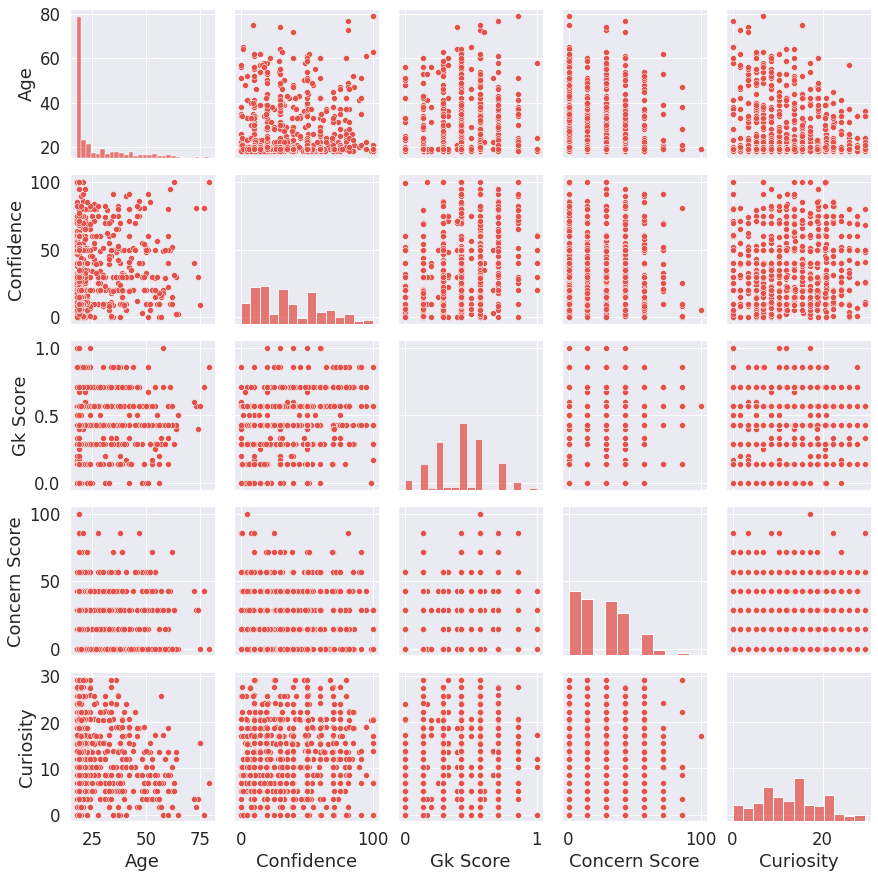

In [69]:
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
ad_data = corr_df
p = sns.pairplot(ad_data)

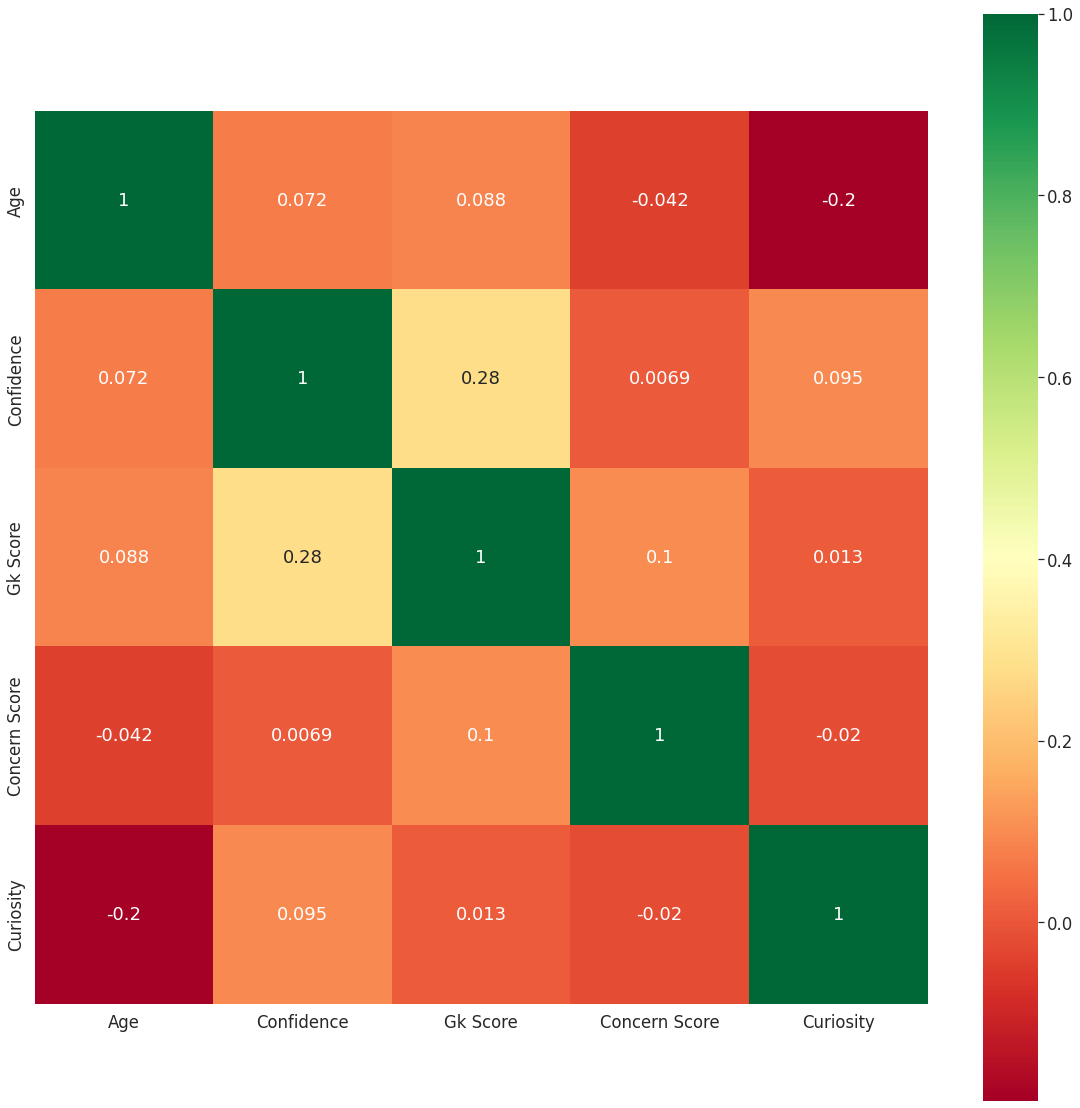

In [70]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

## corr -categorical variables -theil's u

In [71]:
from dython.nominal import associations

dfx = filtered_annotated_df.iloc[:,0:17]
dfx = dfx.drop_duplicates(subset='id')
del dfx['id']
dfx = dfx[['Scoring_profile', 'gender', 'Age Profile', 'Confidence profile', 'Legal', 'student', 'branch', 'concern', 'curiosity']]

In [72]:
dfx

,Scoring_profile,gender,Age Profile,Confidence profile,Legal,student,branch,concern,curiosity
0,Low,Female,Older,Low confidence,Non law,Student,Other branch,Low,High
77,High,Female,Younger,Low confidence,Non law,Student,Other branch,Medium,Low
158,High,Male,Younger,High confident,Non law,Student,Other branch,Medium,High
224,Low,Female,Older,High confident,Non law,Not student,Not a student,Medium,Medium
331,Low,Female,Younger,Low confidence,Non law,Student,Other branch,High,Medium
...,...,...,...,...,...,...,...,...,...
47676,High,Female,Older,Low confidence,Non law,Not student,Not a student,Low,Low
47734,Low,Female,Older,Low confidence,Non law,Not student,Not a student,Medium,Medium
47794,High,Female,Older,Low confidence,Non law,Not student,Not a student,Medium,Medium
47857,Low,Female,Older,High confident,Non law,Not student,Not a student,Medium,Medium


In [73]:
dfx.columns = ['GK Score', 'Gender', 'Age', 'Confidence', 'Law related/ Non law', 'Student/ Non students', 'Other/ Law branches and Non students', 'Concern', 'Genetic Curiosity']

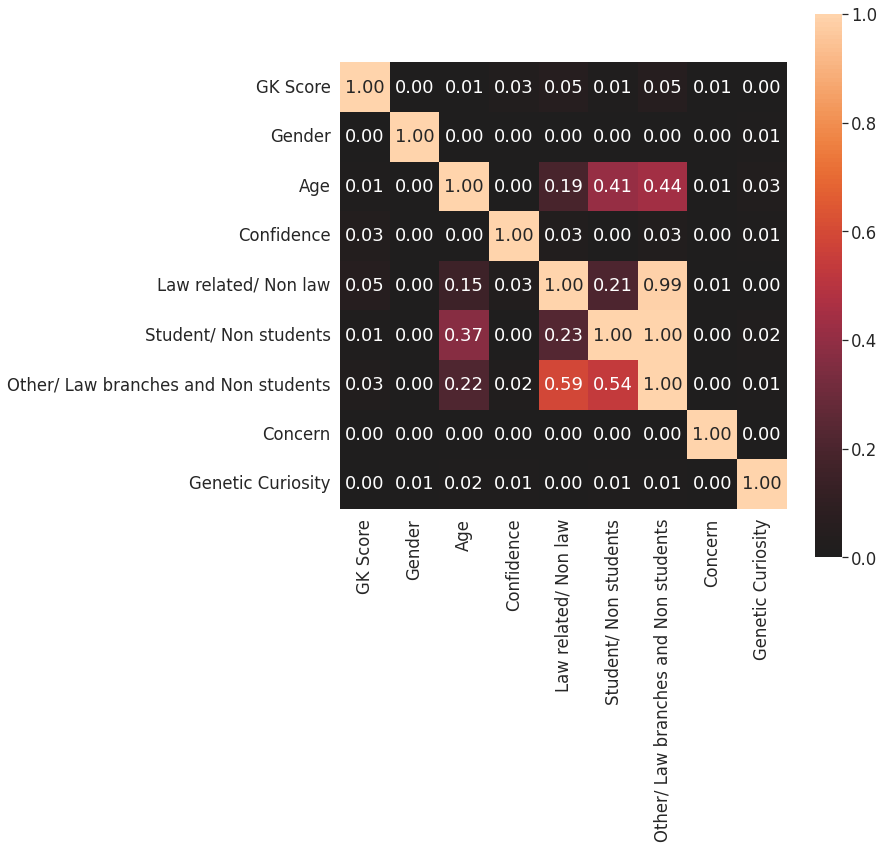

{'corr':                                       GK Score    Gender       Age  \
 GK Score                              1.000000  0.000407  0.006727   
 Gender                                0.000407  1.000000  0.001217   
 Age                                   0.008231  0.001488  1.000000   
 Confidence                            0.031353  0.000139  0.001579   
 Law related/ Non law                  0.049987  0.003904  0.154636   
 Student/ Non students                 0.013509  0.001410  0.373349   
 Other/ Law branches and Non students  0.029387  0.002488  0.215161   
 Concern                               0.003082  0.000455  0.002655   
 Genetic Curiosity                     0.000032  0.006718  0.015074   
 
                                       Confidence  Law related/ Non law  \
 GK Score                                0.030426              0.049569   
 Gender                                  0.000135              0.003876   
 Age                                     0.001875      

In [74]:
associations(dfx, nom_nom_assoc = 'theil' ,nan_strategy='replace', annot=True, figsize=(10,10))


In [75]:
ndfx = dfx[['Concern', 'Genetic Curiosity']].copy()
nndfx = pd.get_dummies(data=ndfx, columns = ndfx.columns)
nndfx.columns = ['Concern High', 'Concern Low', 'Concern Medium','Genetic Curiosity High','Genetic Curiosity Low','Genetic Curiosity Medium']

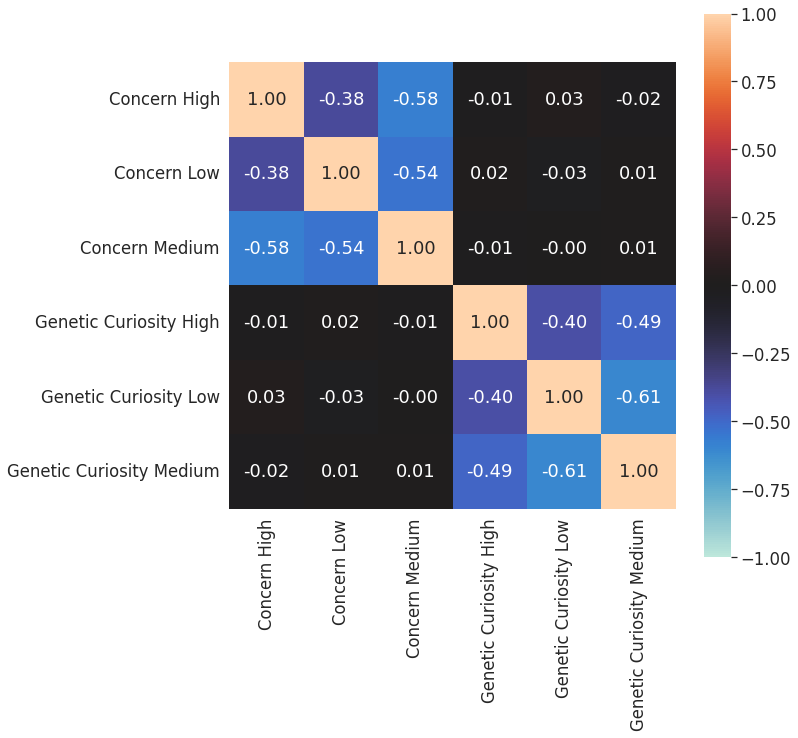

{'corr':                           Concern High  Concern Low  Concern Medium  \
 Concern High                  1.000000    -0.378650       -0.578007   
 Concern Low                  -0.378650     1.000000       -0.536408   
 Concern Medium               -0.578007    -0.536408        1.000000   
 Genetic Curiosity High       -0.009828     0.021414       -0.009919   
 Genetic Curiosity Low         0.031668    -0.031813       -0.000827   
 Genetic Curiosity Medium     -0.021692     0.011769        0.009403   
 
                           Genetic Curiosity High  Genetic Curiosity Low  \
 Concern High                           -0.009828               0.031668   
 Concern Low                             0.021414              -0.031813   
 Concern Medium                         -0.009919              -0.000827   
 Genetic Curiosity High                  1.000000              -0.401243   
 Genetic Curiosity Low                  -0.401243               1.000000   
 Genetic Curiosity Medium     

In [76]:
associations(nndfx, nom_nom_assoc = 'theil' ,nan_strategy='replace', annot=True, figsize=(10,10))


In [77]:
ndfx = dfx
nndfx = pd.get_dummies(data=ndfx, columns = ndfx.columns)
nndfx

,GK Score_High,GK Score_Low,Gender_Female,Gender_Male,Age_Older,Age_Younger,Confidence_High confident,Confidence_Low confidence,Law related/ Non law_Law,Law related/ Non law_Non law,Student/ Non students_Not student,Student/ Non students_Student,Other/ Law branches and Non students_Law branch,Other/ Law branches and Non students_Not a student,Other/ Law branches and Non students_Other branch,Concern_High,Concern_Low,Concern_Medium,Genetic Curiosity_High,Genetic Curiosity_Low,Genetic Curiosity_Medium
0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
77,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0
158,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0
224,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1
331,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47676,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0
47734,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1
47794,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1
47857,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1


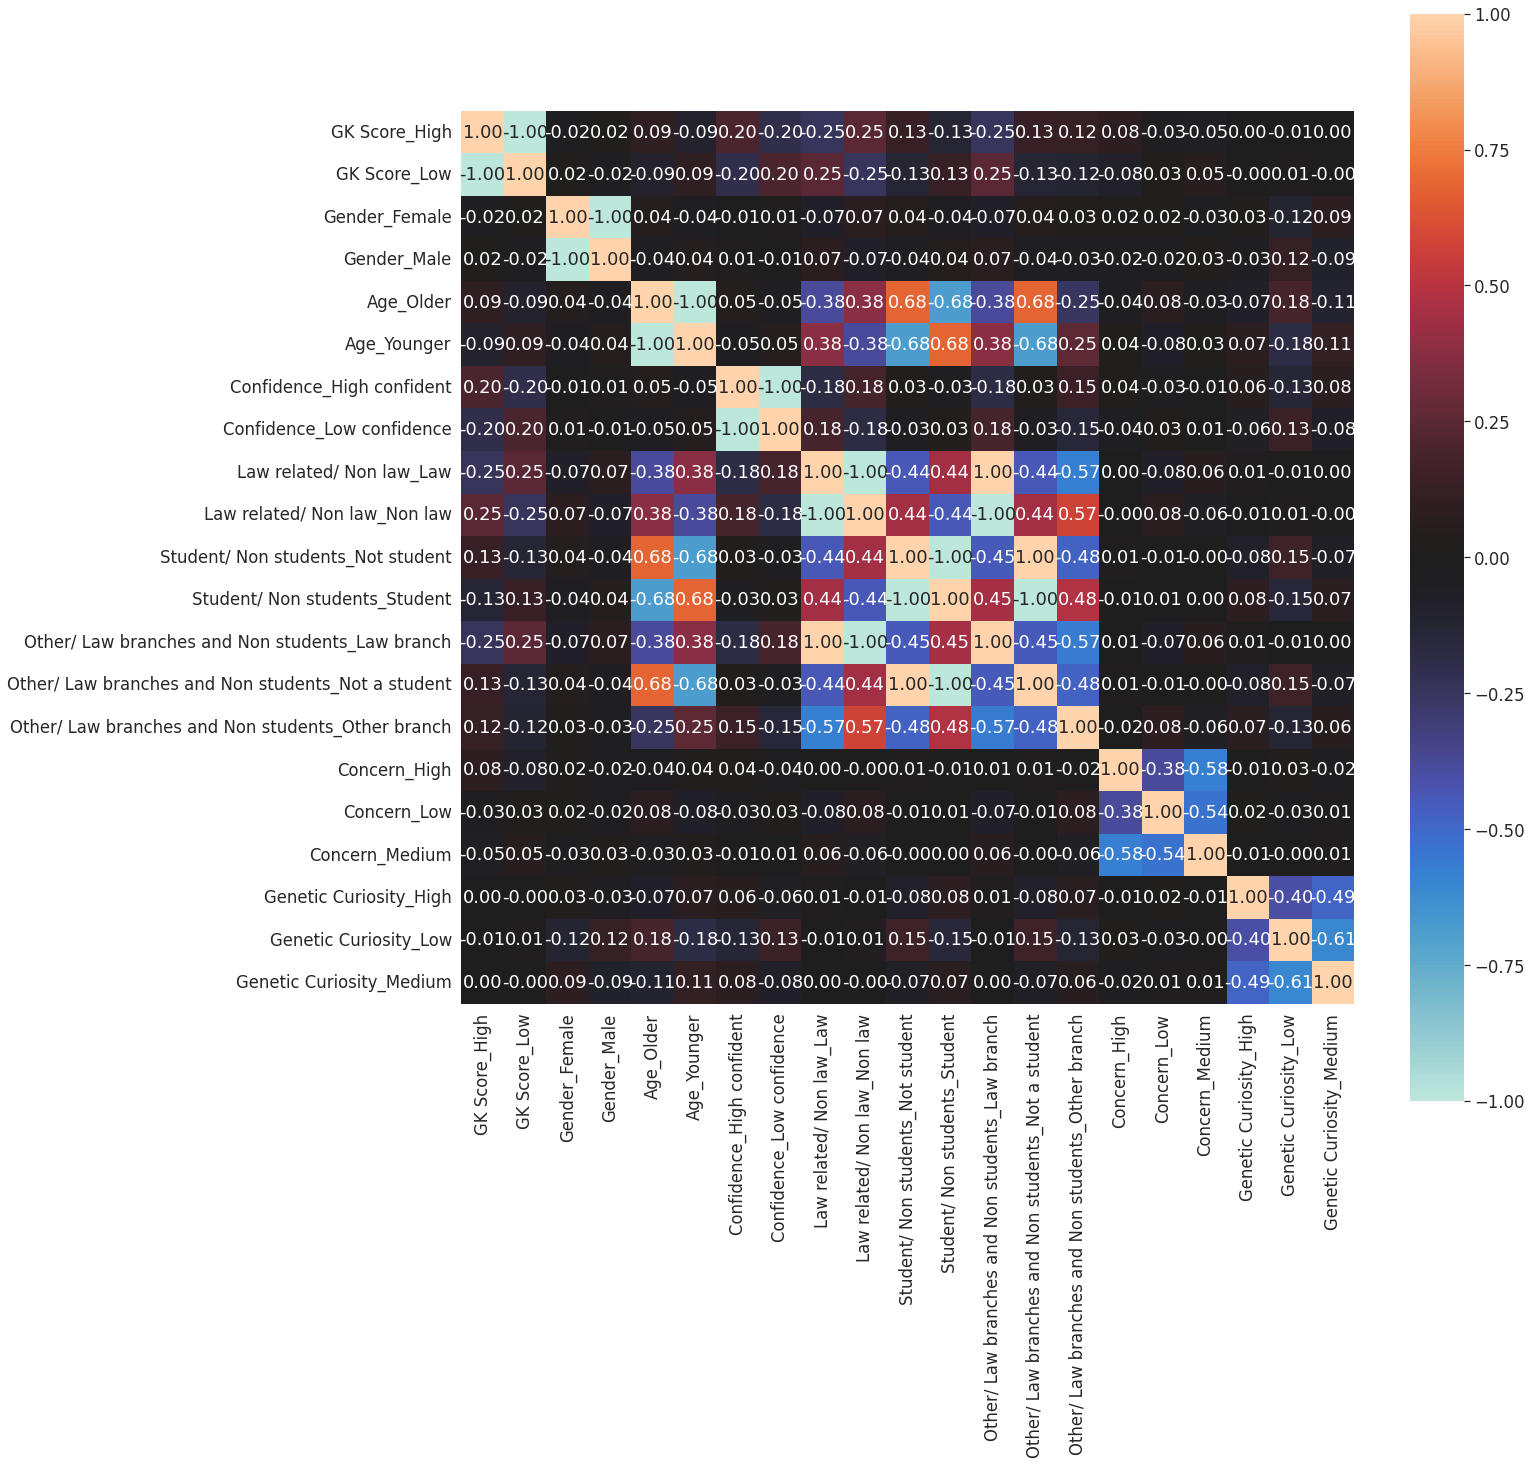

{'corr':                                                     GK Score_High  \
 GK Score_High                                            1.000000   
 GK Score_Low                                            -1.000000   
 Gender_Female                                           -0.023069   
 Gender_Male                                              0.023069   
 Age_Older                                                0.094622   
 Age_Younger                                             -0.094622   
 Confidence_High confident                                0.200921   
 Confidence_Low confidence                               -0.200921   
 Law related/ Non law_Law                                -0.247594   
 Law related/ Non law_Non law                             0.247594   
 Student/ Non students_Not student                        0.127178   
 Student/ Non students_Student                           -0.127178   
 Other/ Law branches and Non students_Law branch         -0.245778   
 Other/ Law 

In [78]:
associations(nndfx, nom_nom_assoc = 'theil' ,nan_strategy='replace', annot=True, figsize=(20,20))


## Categories and other plots

In [79]:
afx = filtered_annotated_df.iloc[:,0:17]
afx = afx.drop_duplicates(subset='id')
afx = afx[['id', 'Scoring_profile', 'gender', 'Age Profile', 'Confidence profile', 'Legal', 'student', 'branch', 'concern', 'curiosity']]
afx.head(2)
afx = afx.melt(id_vars=['id'], 
              value_vars=['Scoring_profile', 'gender', 'Age Profile', 'Confidence profile', 'Legal',
       'student', 'branch', 'concern', 'curiosity'],
              var_name='Description', value_name='Option')
afx.head(2)
afx['Variable'] = 'Class_X'
afx['Group'] = '77'
afx.head(2)
subset_fx = filtered_annotated_df[['id', 'Description', 'Option', 'Variable', 'Group']]
subset_fx.head()
concat_df = pd.concat([afx,subset_fx], axis=0)
concat_df.head(2)
list_of_values = afx.id.unique()
concat_df['id'] = concat_df['id'].map(int)
select_df =  concat_df[concat_df['id'].isin(list_of_values)]
len(select_df.id.unique())

773

In [80]:
list_gp = ['25', '27', '29', '30']
other_df = new_large_df[new_large_df['Group'].isin(list_gp)]
other_df = other_df[['id', 'Description', 'Option', 'Variable', 'Group']].copy()
other_df[other_df['Group'] == '30']
# while ndf
ndf = select_df
ndf.Group.unique()

array(['77', '22', '33', '34', '35', '36', '60', '37', '2', '4', '5', '7',
       '23', '10', '11', '12', '14', '15', '25', '30', '27', '1', '3',
       '13', '24', '16', '21', '19', '32', '57', '8', '9', '65', '66',
       '67', '58', '59', '61', '62', '63', '64', '46', '47', '55', '56',
       '29', '40', '6', '20', '17', '18', '43', '44', '48', '49', '51',
       '52', '41', '42'], dtype=object)

Select for groups 77 ('Scoring_profile', 'Age Profile', 'Confidence profile', 'Legal', 'student', 'branch', 'concern', 'curiosity'), and

23: how many legal guardians needed 24: should there be a law regulating genetic data 65: Dissemination of genetic knowledge to the general public 66: Policymaking – Contributing to working groups concerning the regulation of genetic data 67: Revising and updating ethical guidelines concerning genetic research and use of genetic data

The data has already been filtered and annotated for Language (russian), progress greater than 75, and those completed the gk items. In total 784 participants.

In [81]:
# group filter
ndf['Group'] = ndf['Group'].map(str)

select = ['23', '24', '65', '66', '67']
ndf["Group"] = ndf["Group"].map(str)
ndf = ndf[ndf['Group'].isin(select)]

ndf.shape

(7489, 5)

In [82]:
ndf = pd.concat([ndf, other_df]).reset_index()
ndf.shape
ndf[ndf['Group'] == '30']

,index,id,Description,Option,Variable,Group
7578,20320,0,Should there be a law regulating how a person ...,23andMe,LE3.141,30
7579,20321,1,Should there be a law regulating how a person ...,23andMe,LE3.141,30
7580,20322,5,Should there be a law regulating how a person ...,24 genetics,LE3.141,30
7581,20323,14,Should there be a law regulating how a person ...,23andMe,LE3.141,30
7582,20324,29,Should there be a law regulating how a person ...,23andMe,LE3.141,30
...,...,...,...,...,...,...
7662,20404,290,Should there be a law regulating how a person ...,23andMe,LE3.141,30
7663,20405,296,Should there be a law regulating how a person ...,23andMe,LE3.141,30
7664,20406,298,Should there be a law regulating how a person ...,23andMe,LE3.141,30
7665,20407,300,Should there be a law regulating how a person ...,23andMe,LE3.141,30


In [83]:
ndf.Option.unique()

array(['2', 'Future spouse or partner', 'Spouse or partner', 'Children',
       'Siblings', 'Other relatives', 'Friends', 'Strongly disagree', '6',
       'Agree', 'Strongly agree', '7', '5', 'Neutral', '1', 'Disagree',
       'Other', '3', '4', 'Yes1', 'Do not know1', 'No1', '23andMe',
       '24 genetics', '23mofang', 'Medical testing as Selfasinitiated',
       'Medical testing as Recommended for example by doctor',
       'Medical testing as Compulsory for example by a court or law enforcement',
       'Paternity testing as Selfasinitiated',
       'Paternity testing as Recommended for example by doctor',
       'Paternity testing as Compulsory for example by a court or law enforcement',
       'Ancestry testing as Selfasinitiated',
       'Ancestry testing as Recommended for example by doctor',
       'Ancestry testing as Compulsory for example by a court or law enforcement',
       'General interest as Selfasinitiated',
       'General interest as Recommended for example by docto

### correcting labels

In [84]:
### 23
filter = ndf["Group"] == '23'
ndf_23 = ndf[filter]
ndf_23['Option'] = ndf_23['Option'].map(str)
ndf_23['Option'].replace('1','One legal guardian sufficient',inplace=True)
ndf_23['Option'].replace('2','Two legal guardians need to agree',inplace=True)
ndf_23['Option'].replace('3','Medical facilities',inplace=True)
ndf_23['Option'].replace('4','The State',inplace=True)
ndf_23['Option'].replace('5','Prohibited until child has legal capacity',inplace=True)
ndf_23['Option'].replace('6','Do not know',inplace=True)
ndf_23['Option'].replace('7','Other',inplace=True)

### 
filter = ndf["Group"] == '65'
ndf_65 = ndf[filter]
ndf_65['Option'] = ndf_65['Option'].map(str)
ndf_65['Option'].replace('Agree','Agree to dissemination of GK',inplace=True)
ndf_65['Option'].replace('Strongly agree','Strongly agree to dissemination of GK',inplace=True)
ndf_65['Option'].replace('Neutral','Neutral towards to dissemination of GK',inplace=True)
ndf_65['Option'].replace('Disagree','Disagree to dissemination of GK',inplace=True)
ndf_65['Option'].replace('Strongly disagree','Strongly disagree to dissemination of GK',inplace=True)


### 
filter = ndf["Group"] == '66'
ndf_66 = ndf[filter]
ndf_66['Option'] = ndf_66['Option'].map(str)
ndf_66['Option'].replace('Agree','Agree to Policymaking',inplace=True)
ndf_66['Option'].replace('Strongly agree','Strongly agree to Policymaking',inplace=True)
ndf_66['Option'].replace('Neutral','Neutral towards to Policymaking',inplace=True)
ndf_66['Option'].replace('Disagree','Disagree to Policymaking',inplace=True)
ndf_66['Option'].replace('Strongly disagree','Strongly disagree to Policymaking',inplace=True)

###
filter = ndf["Group"] == '67'
ndf_67 = ndf[filter]
ndf_67['Option'] = ndf_67['Option'].map(str)
ndf_67['Option'].replace('Agree','Agree to Revising and Updating',inplace=True)
ndf_67['Option'].replace('Strongly agree','Strongly agree to Revising and Updating',inplace=True)
ndf_67['Option'].replace('Neutral','Neutral towards to Revising and Updating',inplace=True)
ndf_67['Option'].replace('Disagree','Disagree to Revising and Updating',inplace=True)
ndf_67['Option'].replace('Strongly disagree','Strongly disagree to Revising and Updating',inplace=True)

###
filter = ndf["Group"] == '24'
ndf_24 = ndf[filter]


###
filter = ndf["Group"] == '25'
ndf_25 = ndf[filter]
ndf_25['Option'] = ndf_25['Option'].map(str)
ndf_25['Option'].replace('Yes1','Yes there should be a law',inplace=True)
ndf_25['Option'].replace('No1','No there should not be a law',inplace=True)

###
filter = ndf["Group"] == '27'
ndf_27 = ndf[filter]

###
filter = ndf["Group"] == '29'
ndf_29 = ndf[filter]
ndf_29['Option'] = ndf_25['Option'].map(str)

###
filter = ndf["Group"] == '30'
ndf_30 = ndf[filter]
ndf_30['Option'] = ndf_30['Option'].map(str)


select_df['Group'] = select_df['Group'].map(str)

select = ['77']
cps = select_df[select_df['Group'].isin(select)]


#### 29 - ever had genetic testing

In [85]:
ndf_29_new = pd.merge(ndf_29, ndf29x, on='id')
ndf_29_new = ndf_29_new.drop_duplicates(subset=['id', 'Option_y'])
ndf_29_new['Option'] = ndf_29_new['Option_y']
ndf_29_new['Variable'] = ndf_29_new['Variable_y']
ndf_29_new['Group'] = ndf_29_new['Group_y']
ndf_29_new['Description'] = ndf_29_new['Description_y']
ndf_29_new = ndf_29_new[['id', 'Description', 'Option', 'Variable', 'Group']].copy()
ndf_29_new['Option'].replace('Other', 'No', inplace=True)
ndf_29_new.head(2)

,id,Description,Option,Variable,Group
0,5,Have you ever had genetic testing and why?,Medical testing - Self-initiated,LE2.003,29
1,5,Have you ever had genetic testing and why?,Ancestry testing - Self-initiated,LE2.009,29


In [86]:
cdf = ndf_29_new.groupby(["Group", "Description", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)

In [87]:
del ndfx['Option']
del ndfx['rating']
lex = ndfx.set_index(['Group','Description','Variable']).stack().reset_index()
lex["Option"] = lex['level_3']
lex["Count"] = lex[0]

del lex['level_3']
del lex[0]
lex.head(3)



,Group,Description,Variable,Option,Count
0,29,Have you ever had genetic testing and why?,LE2.003,Medical testing - Self-initiated,207.0
1,29,Have you ever had genetic testing and why?,LE2.004,Medical testing - Recommended by doctor,209.0
2,29,Have you ever had genetic testing and why?,LE2.005,Medical testing - Compulsory by a court or law...,31.0


In [88]:
x = lex.groupby(['Group','Description', 'Variable', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()
xf.head(3)

,Group,Description,Variable,Option,Count
0,29,Have you ever had genetic testing and why?,LE2.003,Medical testing - Self-initiated,0.17
1,29,Have you ever had genetic testing and why?,LE2.004,Medical testing - Recommended by doctor,0.17
2,29,Have you ever had genetic testing and why?,LE2.005,Medical testing - Compulsory by a court or law...,0.03


In [89]:
comp_df = ndf_29_new
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '29'
ndf = comp_df[filter]
# Teaching people's role profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="LE2.003: Have you ever had genetic testing and why? N={}".format(len(comp_df.id.unique()))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



In [90]:
df = ndf_29_new
df['Option'] = df['Option'].map(str)
xx = df['Option'].str.split('-', n=1, expand=True)

comp_df = xx

temp_series = xx[0].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="LE2.003: Have you ever had genetic testing and why? (N={})".format(len(df.id.unique()))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [91]:
df = ndf_29_new
df['Option'] = df['Option'].map(str)
xx = df['Option'].str.split('-', n=1, expand=True)

comp_df = xx

temp_series = xx[1].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="LE2.003: Have you ever had genetic testing and why? (N={})".format(len(df.id.unique()))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [92]:
comp_df = ndf_30
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '30'
ndf = comp_df[filter]
# Teaching people's role profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Variables LE2.25-57: If you have used DTC genetic testing, <br>which company did you use? (N={})".format(len(comp_df.id.unique()))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [93]:
comp_df = ndf_25
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '25'
ndf = comp_df[filter]
# Teaching people's role profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="LE3.141: Should there be a law regulating how a person protects their<br> own genetic data? (N={})".format(len(comp_df))
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [94]:
### participants divided

ndf25_divided = pd.merge(ndf_25, branch_df, on='id')


pdx = ndf25_divided

cdf = pdx.groupby(["Group", "Description", "branch"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['rating']
del ndfx['Option']


lex = ndfx.set_index(['Group','Description', 'branch']).stack().reset_index()
# rename columns 2 and 3



lex["Option"] = lex['level_3']
lex["Count"] = lex[0]

del lex['level_3']
del lex[0]


snorlex = lex
xn = snorlex.groupby(['Group','Description', 'Option', 'branch'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option', 'branch'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()

In [95]:
ndf_25.shape

(89, 6)

In [96]:

fig = px.bar(xn, x="branch", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True,
            )
fig.update_layout(
    title="LE3.141: Should there be a law regulating how a person protects their own genetic data? (N={})".format(len(ndf_25)),
    xaxis_title="Grouped Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)



## combined DF / megadf (who answered the GK item about relatedness correctly?)

**Adding group labels to nodes**
Rationale: In order to determine nodeposition by sorting, I should add a prefix before each option that corresponds to the node position.

77 as 0
23 as 1
24 as 2
65, 66, and 67 as 3, 4, 5
25 as 6
27 as 7
29 as 8
30 as 9
59 (genetic similarity) as 10

In [97]:
pdx = nndf
pdx.head(3)

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag
1927,5,100,RU,Pilot,Self-initiated,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No,GR
1928,5,100,RU,Pilot,Self-initiated,LE2.003,Have you had genetic testing for any of the fo...,Medical testing Selfinitiated,40,No,General
1937,10,100,ES-ES,Pilot,Self-initiated,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No,GR


In [98]:


cps['Option'] = cps['Option']+' '+cps['Description']
cps.Option.unique()

### working with ndf_59 to get correct incorrect tagging for gk item related to relatedness
ndf_59.Option.unique()

nndf_59 = ndf_59
nndf_59['Valid'] = nndf_59['Option'].apply(lambda x: str('Correct' in x) if isinstance('Correct', str) else 'Incorrect')
nndf_59.head(3)

nndf_59[nndf_59['Valid'] == 'True']

rows_to_select = list(ndf_23['id'])
xndf_59 = nndf_59.loc[nndf_59['id'].isin(rows_to_select)]
xndf_59.head(3)

xndf_59['index'] = xndf_59.index
xndf_59 = xndf_59.drop('Progress', axis=1)
xndf_59 = xndf_59.drop('UserLanguage', axis=1) 
xndf_59 = xndf_59.drop('Collection', axis=1) 
xndf_59 = xndf_59.drop('value', axis=1) 
xndf_59 = xndf_59.drop('Composite', axis=1) 
xndf_59 = xndf_59.drop('Tag', axis=1)
xndf_59['Option'] = xndf_59['Valid']
xndf_59 = xndf_59.drop('Valid', axis=1) 
xndf_59
megadf = pd.concat([cps ,ndf_23, ndf_24, ndf_65, ndf_66, ndf_67, ndf_25, ndf_27, ndf_29_new, ndf_30, xndf_59]).reset_index() 
del megadf['level_0']
del megadf['index']
megadf['Group'] = megadf['Group'].map(str)
megadf

,id,Description,Option,Variable,Group
0,0,Scoring_profile,Low Scoring_profile,Class_X,77
1,1,Scoring_profile,High Scoring_profile,Class_X,77
2,3,Scoring_profile,High Scoring_profile,Class_X,77
3,5,Scoring_profile,Low Scoring_profile,Class_X,77
4,14,Scoring_profile,Low Scoring_profile,Class_X,77
...,...,...,...,...,...
20501,1875,"On average, how much of their total DNA is the...",True,LE5.017,59
20502,1885,"On average, how much of their total DNA is the...",False,LE5.017,59
20503,1886,"On average, how much of their total DNA is the...",True,LE5.017,59
20504,1887,"On average, how much of their total DNA is the...",False,LE5.017,59


In [99]:
megadf = pd.concat([cps, ndf_23, ndf_24, ndf_65, ndf_66, ndf_67, ndf_25, ndf_27, ndf_29_new, ndf_30, xndf_59]).reset_index() 
del megadf['level_0']
del megadf['index']
megadf['Group'] = megadf['Group'].map(str)
megadf

,id,Description,Option,Variable,Group
0,0,Scoring_profile,Low Scoring_profile,Class_X,77
1,1,Scoring_profile,High Scoring_profile,Class_X,77
2,3,Scoring_profile,High Scoring_profile,Class_X,77
3,5,Scoring_profile,Low Scoring_profile,Class_X,77
4,14,Scoring_profile,Low Scoring_profile,Class_X,77
...,...,...,...,...,...
20501,1875,"On average, how much of their total DNA is the...",True,LE5.017,59
20502,1885,"On average, how much of their total DNA is the...",False,LE5.017,59
20503,1886,"On average, how much of their total DNA is the...",True,LE5.017,59
20504,1887,"On average, how much of their total DNA is the...",False,LE5.017,59


In [100]:
megadf.Group.unique()

array(['77', '23', '24', '65', '66', '67', '25', '27', '29', '30', '59'],
      dtype=object)

In [101]:
options = megadf.Group.unique()
ranges = list(range(0, len(options)))
# get categorical codes
categories = dict(zip(options,ranges))
categories


{'77': 0,
 '23': 1,
 '24': 2,
 '65': 3,
 '66': 4,
 '67': 5,
 '25': 6,
 '27': 7,
 '29': 8,
 '30': 9,
 '59': 10}

In [102]:
## map categories onto Groups
megadf['Group'] = megadf['Group'].map(str)
megadf['Group'] = megadf['Group'].map(categories)
megadf

megadf['Group'] = megadf['Group'].map(str)
megadf['Option'] = megadf['Option'].map(str)
megadf['Option'] = megadf['Group'] + ' ' + megadf['Option']
megadf

,id,Description,Option,Variable,Group
0,0,Scoring_profile,0 Low Scoring_profile,Class_X,0
1,1,Scoring_profile,0 High Scoring_profile,Class_X,0
2,3,Scoring_profile,0 High Scoring_profile,Class_X,0
3,5,Scoring_profile,0 Low Scoring_profile,Class_X,0
4,14,Scoring_profile,0 Low Scoring_profile,Class_X,0
...,...,...,...,...,...
20501,1875,"On average, how much of their total DNA is the...",10 True,LE5.017,10
20502,1885,"On average, how much of their total DNA is the...",10 False,LE5.017,10
20503,1886,"On average, how much of their total DNA is the...",10 True,LE5.017,10
20504,1887,"On average, how much of their total DNA is the...",10 False,LE5.017,10


**THIS WILL BE USED FOR SANKEY**



In [103]:
megadf['Option'].unique()

array(['0 Low Scoring_profile', '0 High Scoring_profile',
       '0 Female gender', '0 Male gender', '0 Older Age Profile',
       '0 Younger Age Profile', '0 Low confidence Confidence profile',
       '0 High confident Confidence profile', '0 Non law Legal',
       '0 Law Legal', '0 Student student', '0 Not student student',
       '0 Other branch branch', '0 Not a student branch',
       '0 Law branch branch', '0 Low concern', '0 Medium concern',
       '0 High concern', '0 High curiosity', '0 Low curiosity',
       '0 Medium curiosity', '1 Two legal guardians need to agree',
       '1 Do not know', '1 Other',
       '1 Prohibited until child has legal capacity',
       '1 One legal guardian sufficient', '1 Medical facilities',
       '1 The State', '2 Future spouse or partner', '2 Spouse or partner',
       '2 Children', '2 Siblings', '2 Other relatives', '2 Friends',
       '2 Other', '3 Strongly disagree to dissemination of GK',
       '3 Agree to dissemination of GK',
       '3 S

In [104]:
megadf['Option'] = megadf['Option'].map(str)

megadf['Option'].replace('0 Female gender','0 Female Participants',inplace=True)
megadf['Option'].replace('0 Male gender','0 Male Participants',inplace=True)
megadf['Option'].replace('0 Low Scoring_profile','0 Low GK Score',inplace=True)
megadf['Option'].replace('0 High Scoring_profile','0 High GK Score',inplace=True)
megadf['Option'].replace('0 Older Age Profile','0 Older Participants',inplace=True)
megadf['Option'].replace('0 Younger Age Profile','0 Younger Participants',inplace=True)
megadf['Option'].replace('0 Low confidence Confidence profile','0 Low GK Confidence',inplace=True)
megadf['Option'].replace('0 High confident Confidence profile','0 High GK Confidence',inplace=True)
megadf['Option'].replace('0 Non law Legal','0 Participants not related to law',inplace=True)
megadf['Option'].replace('0 Law Legal','0 Participants related to law',inplace=True)
megadf['Option'].replace('0 Student student','0 Students',inplace=True)
megadf['Option'].replace('0 Not student student','0 Not Students',inplace=True)
megadf['Option'].replace('0 Other branch branch','0 Non Law Students',inplace=True)
megadf['Option'].replace('0 Law branch branch','0 Law Students',inplace=True)
megadf['Option'].replace('0 Not a student branch','0 Not Students',inplace=True)
megadf['Option'].replace('0 High curiosity','0 High Genetic Curiosity',inplace=True)
megadf['Option'].replace('0 Medium curiosity','0 Medium Genetic Curiosity',inplace=True)
megadf['Option'].replace('0 Low curiosity','0 Low Genetic Curiosity',inplace=True)
megadf['Option'].replace('0 High concern','0 High Concern',inplace=True)
megadf['Option'].replace('0 Medium concern','0 Medium Concern',inplace=True)
megadf['Option'].replace('0 Low concern','0 Low Concern',inplace=True)

megadf['Description'] = megadf['Description'].map(str)

megadf['Description'].replace('Scoring_profile','GK Score',inplace=True)
megadf['Description'].replace('gender','Gender',inplace=True)
megadf['Description'].replace('Age Profile','Age',inplace=True)
megadf['Description'].replace('Confidence profile','Confidence in GK',inplace=True)
megadf['Description'].replace('Legal','Related/ Not related to law',inplace=True)
megadf['Description'].replace('student','Students/ Non Students',inplace=True)
megadf['Description'].replace('branch','Law or Non Law Students and Non Students',inplace=True)
megadf['Description'].replace('concern','Concern',inplace=True)
megadf['Description'].replace('curiosity','Genetic Curiosity',inplace=True)

In [105]:
BNdf = megadf
BNdf

,id,Description,Option,Variable,Group
0,0,GK Score,0 Low GK Score,Class_X,0
1,1,GK Score,0 High GK Score,Class_X,0
2,3,GK Score,0 High GK Score,Class_X,0
3,5,GK Score,0 Low GK Score,Class_X,0
4,14,GK Score,0 Low GK Score,Class_X,0
...,...,...,...,...,...
20501,1875,"On average, how much of their total DNA is the...",10 True,LE5.017,10
20502,1885,"On average, how much of their total DNA is the...",10 False,LE5.017,10
20503,1886,"On average, how much of their total DNA is the...",10 True,LE5.017,10
20504,1887,"On average, how much of their total DNA is the...",10 False,LE5.017,10


In [106]:
pdx = megadf
cdf = pdx.groupby(["Group", "Description", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['rating']
del ndfx['Option']


lex = ndfx.set_index(['Group','Description', 'Variable']).stack().reset_index()
# rename columns 2 and 3



lex["Option"] = lex['level_3']
lex["Count"] = lex[0]

del lex['level_3']
del lex[0]


snorlex = lex
xn = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()

In [107]:
xn.head(2)

,Group,Description,Option,Count
0,0,Age,0 Older Participants,174.0
1,0,Age,0 Younger Participants,599.0


In [108]:
xn['Group'] = xn['Group'].map(str)
gxn = xn[xn['Group'] == '0']
xf['Group'] = xf['Group'].map(str)
fxn = xf[xf['Group'] != '0']

In [109]:
fig = px.bar(gxn, x="Description", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text="Option"
            )
fig.update_layout(
    title="Number of participants across various groupings (N=773)",
    xaxis_title="Size",
    yaxis_title="",
    legend_title="Groupings",
    font=dict(
        family="Ariel, ariel",
        size=14,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.write_html("./participants_across_groupings.html")


In [110]:
fig = px.bar(fxn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text='Option'
            )
fig.update_layout(
    title="Summary of all GR variables",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

fig.write_html("./summary_GR_variables.html")


### venn overlaps

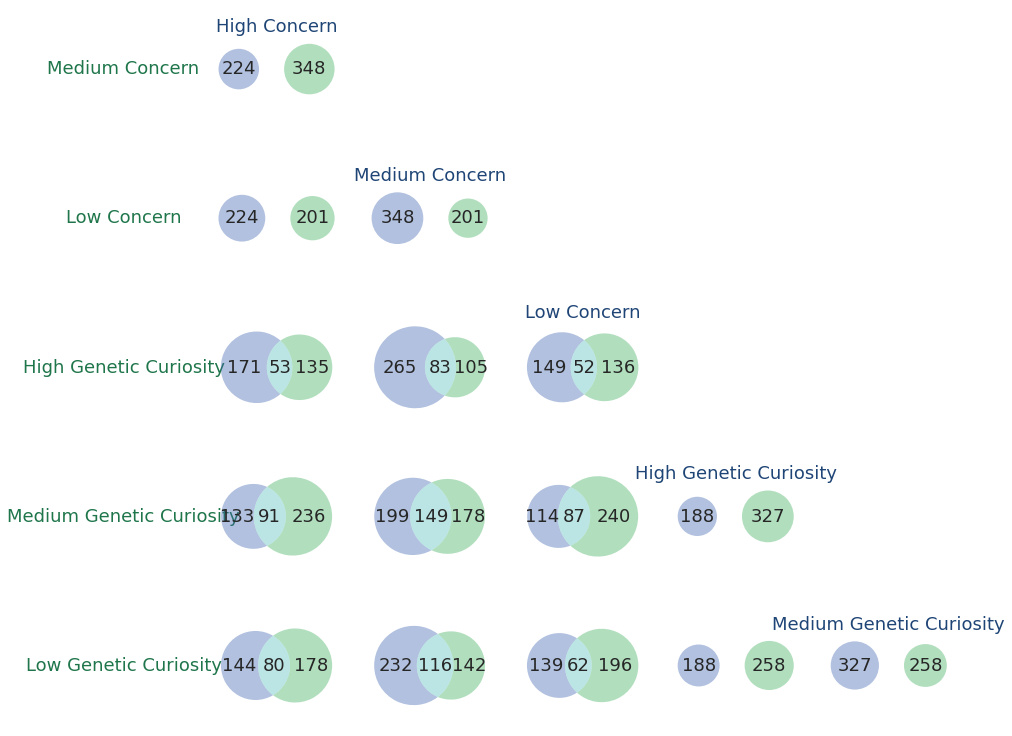

In [111]:
div_pdx = megadf
from matplotlib_venn import venn2, venn2_circles

d1 = set(div_pdx[div_pdx['Option'] == '0 High Concern']['id'])
d2 = set(div_pdx[div_pdx['Option'] == '0 Medium Concern']['id'])
d3 = set(div_pdx[div_pdx['Option'] == '0 Low Concern']['id'])
d4 = set(div_pdx[div_pdx['Option'] == '0 High Genetic Curiosity']['id'])
d5 = set(div_pdx[div_pdx['Option'] == '0 Medium Genetic Curiosity']['id'])
d6 = set(div_pdx[div_pdx['Option'] == '0 Low Genetic Curiosity']['id'])

labels = ['High Concern',
         'Medium Concern',
         'Low Concern',
         'High Genetic Curiosity',
         'Medium Genetic Curiosity',
         'Low Genetic Curiosity']
c = ('#3E64AF', '#3EAF5D')
# subplot indexes
txt_indexes = [1, 7, 13, 19, 25]
title_indexes = [2, 9, 16, 23, 30]
plot_indexes = [8, 14, 20, 26, 15, 21, 27, 22, 28, 29]
# combinations of sets
title_sets = [[set(d1), set(d2)], [set(d2), set(d3)], 
              [set(d3), set(d4)], [set(d4), set(d5)], 
              [set(d5), set(d6)]]
plot_sets = [[set(d1), set(d3)], [set(d1), set(d4)], 
             [set(d1), set(d5)], [set(d1), set(d6)],
             [set(d2), set(d4)], [set(d2), set(d5)],
             [set(d2), set(d6)], [set(d3), set(d5)],
             [set(d3), set(d6)], [set(d4), set(d6)]]
fig, ax = plt.subplots(1, figsize=(16,16))
# plot texts
for idx, txt_idx in enumerate(txt_indexes):
    plt.subplot(6, 6, txt_idx)
    plt.text(0.5,0.5,
             labels[idx+1], 
             ha='center', va='center', color='#1F764B')
    plt.axis('off')
# plot top plots (the ones with a title)
for idx, title_idx in enumerate(title_indexes):
    plt.subplot(6, 6, title_idx)
    venn2(title_sets[idx], set_colors=c, set_labels = (' ', ' '))
    plt.title(labels[idx], fontsize=18, color='#1F4576')
# plot the rest of the diagrams
for idx, plot_idx in enumerate(plot_indexes):
    plt.subplot(6, 6, plot_idx)
    venn2(plot_sets[idx], set_colors=c, set_labels = (' ', ' '))
plt.show()



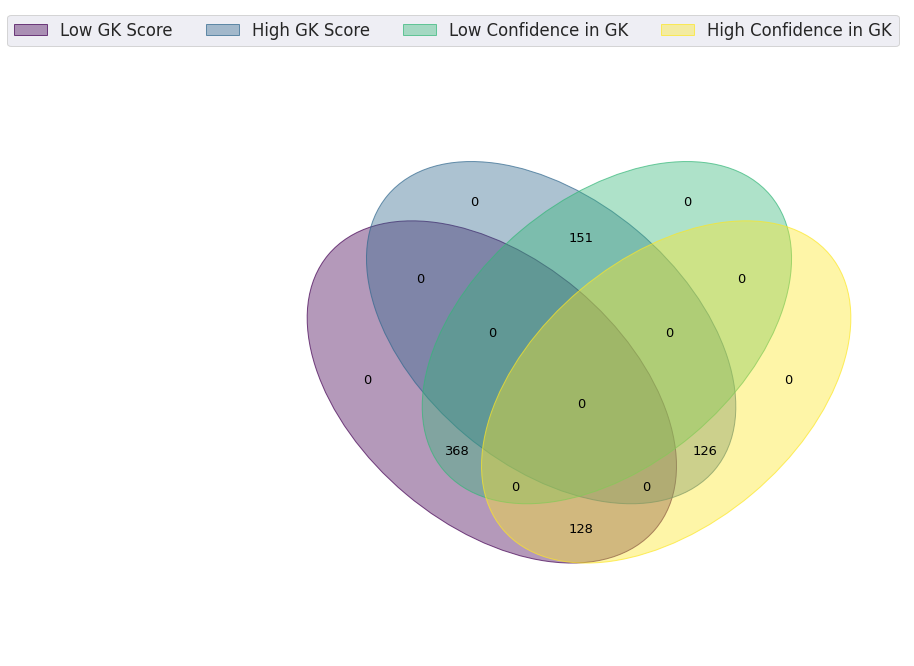

In [112]:
from matplotlib_venn import venn2, venn2_circles

d1 = set(div_pdx[div_pdx['Option'] == '0 Low GK Score']['id'])
d2 = set(div_pdx[div_pdx['Option'] == '0 High GK Score']['id'])
d3 = set(div_pdx[div_pdx['Option'] == '0 Low GK Confidence']['id'])
d4 = set(div_pdx[div_pdx['Option'] == '0 High GK Confidence']['id'])

labels = ['Low GK Score',
         'High GK Score',
         'Low Confidence in GK',
         'High Confidence in GK']

from venn import venn
sets = {
    labels[0]: set(d1),
    labels[1]: set(d2),
    labels[2]: set(d3),
    labels[3]: set(d4)
}
fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=6)



Beyond these we need graph approaches


## item 59 Responses for LE5.017 On average, how much of their total DNA is<br> the same in two people selected at random?

In [113]:
maindf = megadf[megadf['Variable'] == 'Class_X']
maindf

,id,Description,Option,Variable,Group
0,0,GK Score,0 Low GK Score,Class_X,0
1,1,GK Score,0 High GK Score,Class_X,0
2,3,GK Score,0 High GK Score,Class_X,0
3,5,GK Score,0 Low GK Score,Class_X,0
4,14,GK Score,0 Low GK Score,Class_X,0
...,...,...,...,...,...
6952,1875,Genetic Curiosity,0 Low Genetic Curiosity,Class_X,0
6953,1885,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0
6954,1886,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0
6955,1887,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0


In [114]:
maindf.drop('Variable', axis=1, inplace=True) 
maindf.drop('Group', axis=1, inplace=True)


new_df = nndf_59
new_df.drop('Group', axis=1, inplace=True)
new_df.drop('Progress', axis=1, inplace=True)
new_df.drop('UserLanguage', axis=1, inplace=True)
new_df.drop('Collection', axis=1, inplace=True)
new_df.drop('Description', axis=1, inplace=True)
new_df.drop('Composite', axis=1, inplace=True)
new_df.drop('Tag', axis=1, inplace=True)
new_df.drop('Variable', axis=1, inplace=True)
new_df.drop('value', axis=1, inplace=True)

new_df
nnmegadf = reduce(lambda x,y: pd.merge(x,y, on='id', how='outer'), [maindf, new_df])

nnmegadf = nnmegadf.dropna()
nnmegadf['id'] = 1
nnmegadf.dropna(subset=['Option_y'], inplace=True)
nnmegadf.dropna(subset=['Option_x'], inplace=True)
nnmegadf = nnmegadf[nnmegadf['Option_y'] != ' ']

cb_xn = nnmegadf.groupby(['Option_x', 'Option_y', 'Valid'])['id'].sum().reset_index()

In [115]:
newg = cb_xn.groupby(['Option_x'])['id'].sum().reset_index()
newg.columns = ['Option_x', 'total']
cb_xf = pd.merge(newg, cb_xn, on='Option_x')

In [116]:
cb_xf['prop'] = (cb_xf['id']/cb_xf['total']).round(3)
cb_xf

,Option_x,total,Option_y,Valid,id,prop
0,0 Female Participants,488,75 percent,False,129,0.264
1,0 Female Participants,488,90 percent,False,48,0.098
2,0 Female Participants,488,Correct – More than 99 percent,True,89,0.182
3,0 Female Participants,488,Less than 50 percent,False,222,0.455
4,0 High Concern,220,75 percent,False,47,0.214
...,...,...,...,...,...,...
75,0 Students,550,Less than 50 percent,False,238,0.433
76,0 Younger Participants,589,75 percent,False,157,0.267
77,0 Younger Participants,589,90 percent,False,72,0.122
78,0 Younger Participants,589,Correct – More than 99 percent,True,109,0.185


In [117]:
fig_high = px.bar(cb_xn, x="Option_x", color="Valid",
             y='id',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
             text='Option_y'
            )
fig_high.update_layout(
    title="Responses for LE5.017 On average, how much of their total DNA is<br> the same in two people selected at random?",
    xaxis_title="Category",
    yaxis_title="Absolute count of response",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


fig_high.show()

In [118]:
fig_high = px.bar(cb_xf, x="Option_x", color="Valid",
             y='prop',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
             text='Option_y'
            )
fig_high.update_layout(
    title="Responses for LE5.017 On average, how much of their total DNA is<br> the same in two people selected at random?",
    xaxis_title="Category",
    yaxis_title="Proportional count of response",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)
fig_high.show()
fig_high.write_html("./gk_item_relatedness.html")

## Opinion across categories for agreeing or disagreeing

In [119]:
select = ['0']
maindf = megadf[megadf['Group'].isin(select)]
maindf

,id,Description,Option,Variable,Group
0,0,GK Score,0 Low GK Score,Class_X,0
1,1,GK Score,0 High GK Score,Class_X,0
2,3,GK Score,0 High GK Score,Class_X,0
3,5,GK Score,0 Low GK Score,Class_X,0
4,14,GK Score,0 Low GK Score,Class_X,0
...,...,...,...,...,...
6952,1875,Genetic Curiosity,0 Low Genetic Curiosity,Class_X,0
6953,1885,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0
6954,1886,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0
6955,1887,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0


In [120]:
select = ['3', '4', '5']
new_df = megadf[megadf['Group'].isin(select)]

nnmegadf = reduce(lambda x,y: pd.merge(x,y, on='id', how='outer'), [maindf, new_df])
nnmegadf

,id,Description_x,Option_x,Variable_x,Group_x,Description_y,Option_y,Variable_y,Group_y
0,0,GK Score,0 Low GK Score,Class_X,0,Dissemination of genetic knowledge to the gene...,3 Strongly disagree to dissemination of GK,LE3.199,3
1,0,GK Score,0 Low GK Score,Class_X,0,Policymaking – Contributing to working groups ...,4 Strongly disagree to Policymaking,LE3.200,4
2,0,GK Score,0 Low GK Score,Class_X,0,Revising and updating ethical guidelines conce...,5 Strongly disagree to Revising and Updating,LE3.201,5
3,0,Gender,0 Female Participants,Class_X,0,Dissemination of genetic knowledge to the gene...,3 Strongly disagree to dissemination of GK,LE3.199,3
4,0,Gender,0 Female Participants,Class_X,0,Policymaking – Contributing to working groups ...,4 Strongly disagree to Policymaking,LE3.200,4
...,...,...,...,...,...,...,...,...,...
20344,1888,Concern,0 Medium Concern,Class_X,0,Policymaking – Contributing to working groups ...,4 Strongly agree to Policymaking,LE3.200,4
20345,1888,Concern,0 Medium Concern,Class_X,0,Revising and updating ethical guidelines conce...,5 Strongly agree to Revising and Updating,LE3.201,5
20346,1888,Genetic Curiosity,0 Low Genetic Curiosity,Class_X,0,Dissemination of genetic knowledge to the gene...,3 Strongly agree to dissemination of GK,LE3.199,3
20347,1888,Genetic Curiosity,0 Low Genetic Curiosity,Class_X,0,Policymaking – Contributing to working groups ...,4 Strongly agree to Policymaking,LE3.200,4


In [121]:
len(nnmegadf.id.unique())

773

In [122]:
maindf.drop('Variable', axis=1, inplace=True) 

In [123]:


nnmegadf = nnmegadf.dropna()
nnmegadf['id'] = 1
nnmegadf.dropna(subset=['Option_y'], inplace=True)
nnmegadf.dropna(subset=['Option_x'], inplace=True)
nnmegadf = nnmegadf[nnmegadf['Option_y'] != ' ']
cb_xn = nnmegadf.groupby(['Option_x', 'Option_y', 'Group_y'])['id'].sum().reset_index()


In [124]:
cb_xn['Option_x'] = cb_xn['Option_x']+ ' ' + cb_xn['Group_y'] 

In [125]:
newg = cb_xn.groupby(['Option_x', 'Group_y'])['id'].sum().reset_index()
newg.columns = ['Option_x', 'Group', 'total']


In [126]:

cb_xf = pd.merge(newg, cb_xn, on='Option_x')
cb_xf['prop'] = (cb_xf['id']/cb_xf['total']).round(3)
cb_xf

,Option_x,Group,total,Option_y,Group_y,id,prop
0,0 Female Participants 3,3,487,3 Agree to dissemination of GK,3,224,0.460
1,0 Female Participants 3,3,487,3 Disagree to dissemination of GK,3,19,0.039
2,0 Female Participants 3,3,487,3 Neutral towards to dissemination of GK,3,28,0.057
3,0 Female Participants 3,3,487,3 Strongly agree to dissemination of GK,3,181,0.372
4,0 Female Participants 3,3,487,3 Strongly disagree to dissemination of GK,3,35,0.072
...,...,...,...,...,...,...,...
295,0 Younger Participants 5,5,576,5 Agree to Revising and Updating,5,285,0.495
296,0 Younger Participants 5,5,576,5 Disagree to Revising and Updating,5,32,0.056
297,0 Younger Participants 5,5,576,5 Neutral towards to Revising and Updating,5,73,0.127
298,0 Younger Participants 5,5,576,5 Strongly agree to Revising and Updating,5,154,0.267


In [127]:
cb_xn['Option_x'] = cb_xn['Option_x'].str[:-2]
cb_xf['Option_x'] = cb_xf['Option_x'].str[:-2]

In [128]:
fig_high = px.bar(cb_xn, x="Option_x", color="Option_y",
             y='id',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
             text='Option_y',
            facet_row = 'Group_y'
            )
fig_high.update_layout(
    title="Responses for LE5.017 On average, how much of their total DNA is<br> the same in two people selected at random?",
    xaxis_title="Category",
    yaxis_title="Absolute count of response",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


fig_high.update_yaxes(title='')
fig_high.update_layout(yaxis2=dict(title="Absolute count of response"))

In [129]:
fig_high = px.bar(cb_xf, x="Option_x", color="Option_y",
             y='prop',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
             text='Option_y',
            facet_row = 'Group_y'
            )
fig_high.update_layout(
    title="Opinion on likert items across 773 participants.",
    xaxis_title="Category",
    yaxis_title="Proportional count of responses",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig_high.update_yaxes(title='')
fig_high.update_layout(yaxis2=dict(title="Proportional count of response"))

## Opinion across categories for agreeing or disagreeing reduced to agreeing or disagreeing

In [130]:
select = ['0']
maindf = megadf[megadf['Group'].isin(select)]

select = ['3', '4', '5']
new_df = megadf[megadf['Group'].isin(select)] 

nnmegadf = reduce(lambda x,y: pd.merge(x,y, on='id', how='outer'), [maindf, new_df])

maindf.drop('Variable', axis=1, inplace=True) 

maindf

,id,Description,Option,Group
0,0,GK Score,0 Low GK Score,0
1,1,GK Score,0 High GK Score,0
2,3,GK Score,0 High GK Score,0
3,5,GK Score,0 Low GK Score,0
4,14,GK Score,0 Low GK Score,0
...,...,...,...,...
6952,1875,Genetic Curiosity,0 Low Genetic Curiosity,0
6953,1885,Genetic Curiosity,0 Medium Genetic Curiosity,0
6954,1886,Genetic Curiosity,0 Medium Genetic Curiosity,0
6955,1887,Genetic Curiosity,0 Medium Genetic Curiosity,0


In [131]:
nnmegadf = nnmegadf.dropna()
nnmegadf['id'] = 1
nnmegadf.dropna(subset=['Option_y'], inplace=True)
nnmegadf.dropna(subset=['Option_x'], inplace=True)
nnmegadf = nnmegadf[nnmegadf['Option_y'] != ' ']
nnmegadf['Option_y'] = nnmegadf['Option_y'].str.replace(' Strongly a',' A')
nnmegadf['Option_y'] = nnmegadf['Option_y'].str.replace(' Strongly d',' D')
nnmegadf

,id,Description_x,Option_x,Variable_x,Group_x,Description_y,Option_y,Variable_y,Group_y
0,1,GK Score,0 Low GK Score,Class_X,0,Dissemination of genetic knowledge to the gene...,3 Disagree to dissemination of GK,LE3.199,3
1,1,GK Score,0 Low GK Score,Class_X,0,Policymaking – Contributing to working groups ...,4 Disagree to Policymaking,LE3.200,4
2,1,GK Score,0 Low GK Score,Class_X,0,Revising and updating ethical guidelines conce...,5 Disagree to Revising and Updating,LE3.201,5
3,1,Gender,0 Female Participants,Class_X,0,Dissemination of genetic knowledge to the gene...,3 Disagree to dissemination of GK,LE3.199,3
4,1,Gender,0 Female Participants,Class_X,0,Policymaking – Contributing to working groups ...,4 Disagree to Policymaking,LE3.200,4
...,...,...,...,...,...,...,...,...,...
20344,1,Concern,0 Medium Concern,Class_X,0,Policymaking – Contributing to working groups ...,4 Agree to Policymaking,LE3.200,4
20345,1,Concern,0 Medium Concern,Class_X,0,Revising and updating ethical guidelines conce...,5 Agree to Revising and Updating,LE3.201,5
20346,1,Genetic Curiosity,0 Low Genetic Curiosity,Class_X,0,Dissemination of genetic knowledge to the gene...,3 Agree to dissemination of GK,LE3.199,3
20347,1,Genetic Curiosity,0 Low Genetic Curiosity,Class_X,0,Policymaking – Contributing to working groups ...,4 Agree to Policymaking,LE3.200,4


In [132]:

cb_xn = nnmegadf.groupby(['Option_x', 'Option_y', 'Group_y'])['id'].sum().reset_index()


cb_xn['Option_x'] = cb_xn['Option_x']+ ' ' + cb_xn['Group_y'] 


newg = cb_xn.groupby(['Option_x', 'Group_y'])['id'].sum().reset_index()
newg.columns = ['Option_x', 'Group', 'total']


cb_xf = pd.merge(newg, cb_xn, on='Option_x')
cb_xf['prop'] = (cb_xf['id']/cb_xf['total']).round(3)
cb_xf

cb_xn['Option_x'] = cb_xn['Option_x'].str[:-2]
cb_xf['Option_x'] = cb_xf['Option_x'].str[:-2]



In [133]:
fig_high = px.bar(cb_xn, x="Option_x", color="Option_y",
             y='id',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
             text='Option_y',
            facet_row = 'Group_y'
            )
fig_high.update_layout(
    title="Responses for LE5.017 On average, how much of their total DNA is<br> the same in two people selected at random?",
    xaxis_title="Category",
    yaxis_title="Absolute count of response",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


fig_high.update_yaxes(title='')
fig_high.update_layout(yaxis2=dict(title="Absolute count of response"))

In [134]:
fig_high = px.bar(cb_xf, x="Option_x", color="Option_y",
             y='prop',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
             text='Option_y',
            facet_row = 'Group_y'
            )
fig_high.update_layout(
    title="Responses for LE5.017 On average, how much of their total DNA is<br> the same in two people selected at random?",
    xaxis_title="Category",
    yaxis_title="Absolute count of response",
    legend_title="Options",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


fig_high.update_yaxes(title='')
fig_high.update_layout(yaxis2=dict(title="Proportional count of response"))

## Newborn screening across categories

In [135]:
select = ['0']
maindf = megadf[megadf['Group'].isin(select)]


select = ['1']
new_df = megadf[megadf['Group'].isin(select)]

nnmegadf = reduce(lambda x,y: pd.merge(x,y, on='id', how='outer'), [maindf, new_df])

maindf.drop('Variable', axis=1, inplace=True) 





nnmegadf = nnmegadf.dropna()
nnmegadf['id'] = 1
nnmegadf.dropna(subset=['Option_y'], inplace=True)
nnmegadf.dropna(subset=['Option_x'], inplace=True)
nnmegadf = nnmegadf[nnmegadf['Option_y'] != ' ']



In [136]:
cb_xn = nnmegadf.groupby(['Option_x', 'Option_y', 'Group_y'])['id'].sum().reset_index()

cb_xn



,Option_x,Option_y,Group_y,id
0,0 Female Participants,1 Do not know,1,46
1,0 Female Participants,1 Medical facilities,1,18
2,0 Female Participants,1 One legal guardian sufficient,1,21
3,0 Female Participants,1 Other,1,7
4,0 Female Participants,1 Prohibited until child has legal capacity,1,144
...,...,...,...,...
131,0 Younger Participants,1 One legal guardian sufficient,1,23
132,0 Younger Participants,1 Other,1,7
133,0 Younger Participants,1 Prohibited until child has legal capacity,1,180
134,0 Younger Participants,1 The State,1,4


In [137]:
newg = cb_xn.groupby(['Option_x', 'Group_y'])['id'].sum().reset_index()
newg.columns = ['Option_x', 'Group', 'total']

cb_xf = pd.merge(newg, cb_xn, on='Option_x')
cb_xf['prop'] = (cb_xf['id']/cb_xf['total']).round(3)

In [138]:
cb_xf

,Option_x,Group,total,Option_y,Group_y,id,prop
0,0 Female Participants,1,497,1 Do not know,1,46,0.093
1,0 Female Participants,1,497,1 Medical facilities,1,18,0.036
2,0 Female Participants,1,497,1 One legal guardian sufficient,1,21,0.042
3,0 Female Participants,1,497,1 Other,1,7,0.014
4,0 Female Participants,1,497,1 Prohibited until child has legal capacity,1,144,0.290
...,...,...,...,...,...,...,...
131,0 Younger Participants,1,599,1 One legal guardian sufficient,1,23,0.038
132,0 Younger Participants,1,599,1 Other,1,7,0.012
133,0 Younger Participants,1,599,1 Prohibited until child has legal capacity,1,180,0.301
134,0 Younger Participants,1,599,1 The State,1,4,0.007


In [139]:
fig_high = px.bar(cb_xn, x="Option_x", color="Option_y",
             y='id',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
             text='Option_y'
            )
fig_high.update_layout(
    title="LE3.087: In most instances, and assuming two parents will be involved in raising a child,<br> who should decide on sequencing a child’s genome at birth?",
    xaxis_title="Category",
    yaxis_title="Absolute count of response",
    legend_title="Category",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)




In [140]:
fig_high = px.bar(cb_xf, x="Option_x", color="Option_y",
             y='prop',
             title="LE3.087: In most instances, and assuming two parents will be <br> involved in raising a child, who should decide on sequencing a child’s genome at birth?",
             barmode='group',
             height=1080,
             text='Option_y'
            )
fig_high.update_layout(
    title="LE3.087: In most instances, and assuming two parents will be involved in raising a child, <br> who should decide on sequencing a child’s genome at birth?",
    xaxis_title="Category",
    yaxis_title="Proportional count of response",
    legend_title="Category",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)



## Relatedness X newbornscreening (is there a difference in opinion of participants who are getting the item wrong with who should sequence)

In [141]:
select = ['1']
maindf = megadf[megadf['Group'].isin(select)]


select = ['10']
new_df = megadf[megadf['Group'].isin(select)]

nnmegadf = reduce(lambda x,y: pd.merge(x,y, on='id', how='outer'), [maindf, new_df])

maindf.drop('Variable', axis=1, inplace=True) 





nnmegadf = nnmegadf.dropna()
nnmegadf['id'] = 1
nnmegadf.dropna(subset=['Option_y'], inplace=True)
nnmegadf.dropna(subset=['Option_x'], inplace=True)
nnmegadf = nnmegadf[nnmegadf['Option_y'] != ' ']


cb_xn = nnmegadf.groupby(['Option_x', 'Option_y', 'Group_y'])['id'].sum().reset_index()

cb_xn = cb_xn.sort_values(by='id', ascending=False)
cb_xn

,Option_x,Option_y,Group_y,id
12,1 Two legal guardians need to agree,10 False,10,319
8,1 Prohibited until child has legal capacity,10 False,10,187
13,1 Two legal guardians need to agree,10 True,10,85
0,1 Do not know,10 False,10,55
9,1 Prohibited until child has legal capacity,10 True,10,43
2,1 Medical facilities,10 False,10,22
4,1 One legal guardian sufficient,10 False,10,21
5,1 One legal guardian sufficient,10 True,10,12
1,1 Do not know,10 True,10,9
6,1 Other,10 False,10,8


In [142]:
newg = cb_xn.groupby(['Option_y', 'Group_y'])['id'].sum().reset_index()
newg.columns = ['Option_y', 'Group_y', 'total']
newg

,Option_y,Group_y,total
0,10 False,10,615
1,10 True,10,158


In [143]:
cb_xf = pd.merge(newg, cb_xn, on='Option_y')
cb_xf['prop'] = (cb_xf['id']/cb_xf['total']).round(3)
cb_xf

,Option_y,Group_y_x,total,Option_x,Group_y_y,id,prop
0,10 False,10,615,1 Two legal guardians need to agree,10,319,0.519
1,10 False,10,615,1 Prohibited until child has legal capacity,10,187,0.304
2,10 False,10,615,1 Do not know,10,55,0.089
3,10 False,10,615,1 Medical facilities,10,22,0.036
4,10 False,10,615,1 One legal guardian sufficient,10,21,0.034
5,10 False,10,615,1 Other,10,8,0.013
6,10 False,10,615,1 The State,10,3,0.005
7,10 True,10,158,1 Two legal guardians need to agree,10,85,0.538
8,10 True,10,158,1 Prohibited until child has legal capacity,10,43,0.272
9,10 True,10,158,1 One legal guardian sufficient,10,12,0.076


In [144]:
fig_high = px.bar(cb_xn, x="Option_x", color="Option_y",
             y='id',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
                  facet_col='Option_y'
            )
fig_high.update_layout(
    title="LE3.087: In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a <br> child’s genome at birth?",
    xaxis_title="Selected option",
    yaxis_title="Absolute count of response",
    legend_title="Category",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)
fig_high.update_xaxes(title='')
fig_high.update_layout(xaxis2=dict(title="Selected option"))

In [145]:
fig_high = px.bar(cb_xf, x="Option_y", color="Option_x",
             y='prop',
             title="Responses for LE5.017 On average, how much of their total DNA is the same in two people selected at random?",
             barmode='group',
             height=1080,
                  text='Option_x'
            )
fig_high.update_layout(
    title="LE3.087: In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a <br> child’s genome at birth?",
    xaxis_title="True/ False",
    yaxis_title="Proportional count of response",
    legend_title="Category",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


## Newborn screening across categories reduced to individual responsibility versus other responsibility

In [146]:
select = ['1']
maindf = megadf[megadf['Group'].isin(select)]


select = ['10']
new_df = megadf[megadf['Group'].isin(select)]

nnmegadf = reduce(lambda x,y: pd.merge(x,y, on='id', how='outer'), [maindf, new_df])

maindf.drop('Variable', axis=1, inplace=True) 





nnmegadf = nnmegadf.dropna()
nnmegadf['id'] = 1
nnmegadf.dropna(subset=['Option_y'], inplace=True)
nnmegadf.dropna(subset=['Option_x'], inplace=True)
nnmegadf = nnmegadf[nnmegadf['Option_y'] != ' ']

nnmegadf.Option_x.unique()

array(['1 Two legal guardians need to agree', '1 Do not know', '1 Other',
       '1 Prohibited until child has legal capacity',
       '1 One legal guardian sufficient', '1 Medical facilities',
       '1 The State'], dtype=object)

In [147]:
nnmegadf['Option_x'] = nnmegadf['Option_x'].str.replace('1 Two legal guardians need to agree','Legal guardians')
nnmegadf['Option_x'] = nnmegadf['Option_x'].str.replace('1 One legal guardian sufficient','Legal guardians')
nnmegadf['Option_x'] = nnmegadf['Option_x'].str.replace('1 Medical facilities','Medical and State')
nnmegadf['Option_x'] = nnmegadf['Option_x'].str.replace('1 The State','Medical and State')
nnmegadf['Option_x'] = nnmegadf['Option_x'].str.replace('1 Prohibited until child has legal capacity','Decision of the individual')

In [148]:
nnmegadf.head(2)

,id,Description_x,Option_x,Variable_x,Group_x,Description_y,Option_y,Variable_y,Group_y
0,1,"In most instances, and assuming two parents wi...",Legal guardians,LE3.087,1,"On average, how much of their total DNA is the...",10 False,LE5.017,10
1,1,"In most instances, and assuming two parents wi...",1 Do not know,LE3.087,1,"On average, how much of their total DNA is the...",10 False,LE5.017,10


In [149]:
nnmegadf = nnmegadf.dropna()
nnmegadf['id'] = 1
nnmegadf.dropna(subset=['Option_y'], inplace=True)
nnmegadf.dropna(subset=['Option_x'], inplace=True)
nnmegadf = nnmegadf[nnmegadf['Option_y'] != ' ']


cb_xn = nnmegadf.groupby(['Option_x', 'Option_y', 'Group_y'])['id'].sum().reset_index()

cb_xn = cb_xn.sort_values(by='id', ascending=False)
cb_xn

,Option_x,Option_y,Group_y,id
6,Legal guardians,10 False,10,340
4,Decision of the individual,10 False,10,187
7,Legal guardians,10 True,10,97
0,1 Do not know,10 False,10,55
5,Decision of the individual,10 True,10,43
8,Medical and State,10 False,10,25
1,1 Do not know,10 True,10,9
2,1 Other,10 False,10,8
9,Medical and State,10 True,10,7
3,1 Other,10 True,10,2


In [150]:
newg = cb_xn.groupby(['Option_y', 'Group_y'])['id'].sum().reset_index()
newg.columns = ['Option_y', 'Group_y', 'total']

cb_xf = pd.merge(newg, cb_xn, on='Option_y')
cb_xf['prop'] = (cb_xf['id']/cb_xf['total']).round(3)
cb_xf['Option_x_1'] = cb_xf['Option_x']
cb_xf['Option_x'] = cb_xf['Option_x']+' '+cb_xf['prop'].astype(str)


In [151]:
cb_xf

,Option_y,Group_y_x,total,Option_x,Group_y_y,id,prop,Option_x_1
0,10 False,10,615,Legal guardians 0.553,10,340,0.553,Legal guardians
1,10 False,10,615,Decision of the individual 0.304,10,187,0.304,Decision of the individual
2,10 False,10,615,1 Do not know 0.089,10,55,0.089,1 Do not know
3,10 False,10,615,Medical and State 0.041,10,25,0.041,Medical and State
4,10 False,10,615,1 Other 0.013,10,8,0.013,1 Other
5,10 True,10,158,Legal guardians 0.614,10,97,0.614,Legal guardians
6,10 True,10,158,Decision of the individual 0.272,10,43,0.272,Decision of the individual
7,10 True,10,158,1 Do not know 0.057,10,9,0.057,1 Do not know
8,10 True,10,158,Medical and State 0.044,10,7,0.044,Medical and State
9,10 True,10,158,1 Other 0.013,10,2,0.013,1 Other


In [152]:
fig_high = px.bar(cb_xn, x="Option_x", color="Option_y",
             y='id',
             title="Responses for LE5.017 Rephrased for Responsibility",
             barmode='group',
             height=1080,
                  facet_col='Option_y'
            )
fig_high.update_layout(
    title="LE3.087: In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a <br> child’s genome at birth?",
    xaxis_title="Selected option",
    yaxis_title="Absolute count of response",
    legend_title="Category",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)
fig_high.update_xaxes(title='')
fig_high.update_layout(xaxis2=dict(title="Selected option"))


In [153]:
fig_high = px.bar(cb_xf, x="Option_y", color="Option_x_1",
             y='prop',
             title="Responses for LE5.017 Rephrased for Responsibility",
             barmode='group',
             height=1080,
                  text='Option_x'
            )
fig_high.update_layout(
    title="LE3.087: In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a <br> child’s genome at birth?",
    xaxis_title="True/ False",
    yaxis_title="Proportional count of response",
    legend_title="Category",
    font=dict(
        family="Ariel, ariel",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig_high.update_traces(showlegend=False)
fig_high.update_traces(marker_showscale=False)

fig_high.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


## MCA plot

In [154]:
# MCA
import prince

gxf = megadf
#del gxf['level_0']
#del gxf['index']
gxf.head(2)

gxf['Group'] = gxf['Group'].map(str)
nlarge_df = gxf[gxf['Group'] == '0']
selected_columns = nlarge_df[['Option']]
nlex = selected_columns.copy()
annot = nlarge_df[['id', 'Description']]
selected_columns = nlex[['Option']]
nlex = selected_columns.copy()
onehotnlex =  pd.get_dummies(nlex,drop_first=True)
onehotnlex = onehotnlex.dropna()
onehotnlex.replace({0: "False", 1: "True"}, inplace = True)
newx = pd.concat([annot, onehotnlex], axis=1)
##
newx

,id,Description,Option_0 High Concern,Option_0 High GK Confidence,Option_0 High GK Score,Option_0 High Genetic Curiosity,Option_0 Law Students,Option_0 Low Concern,Option_0 Low GK Confidence,Option_0 Low GK Score,Option_0 Low Genetic Curiosity,Option_0 Male Participants,Option_0 Medium Concern,Option_0 Medium Genetic Curiosity,Option_0 Non Law Students,Option_0 Not Students,Option_0 Older Participants,Option_0 Participants not related to law,Option_0 Participants related to law,Option_0 Students,Option_0 Younger Participants
0,0,GK Score,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,1,GK Score,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,GK Score,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,5,GK Score,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,14,GK Score,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,1875,Genetic Curiosity,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
6953,1885,Genetic Curiosity,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6954,1886,Genetic Curiosity,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6955,1887,Genetic Curiosity,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [155]:
mca = prince.MCA(random_state=42)
ca = mca.fit(newx.iloc[:,2:21])

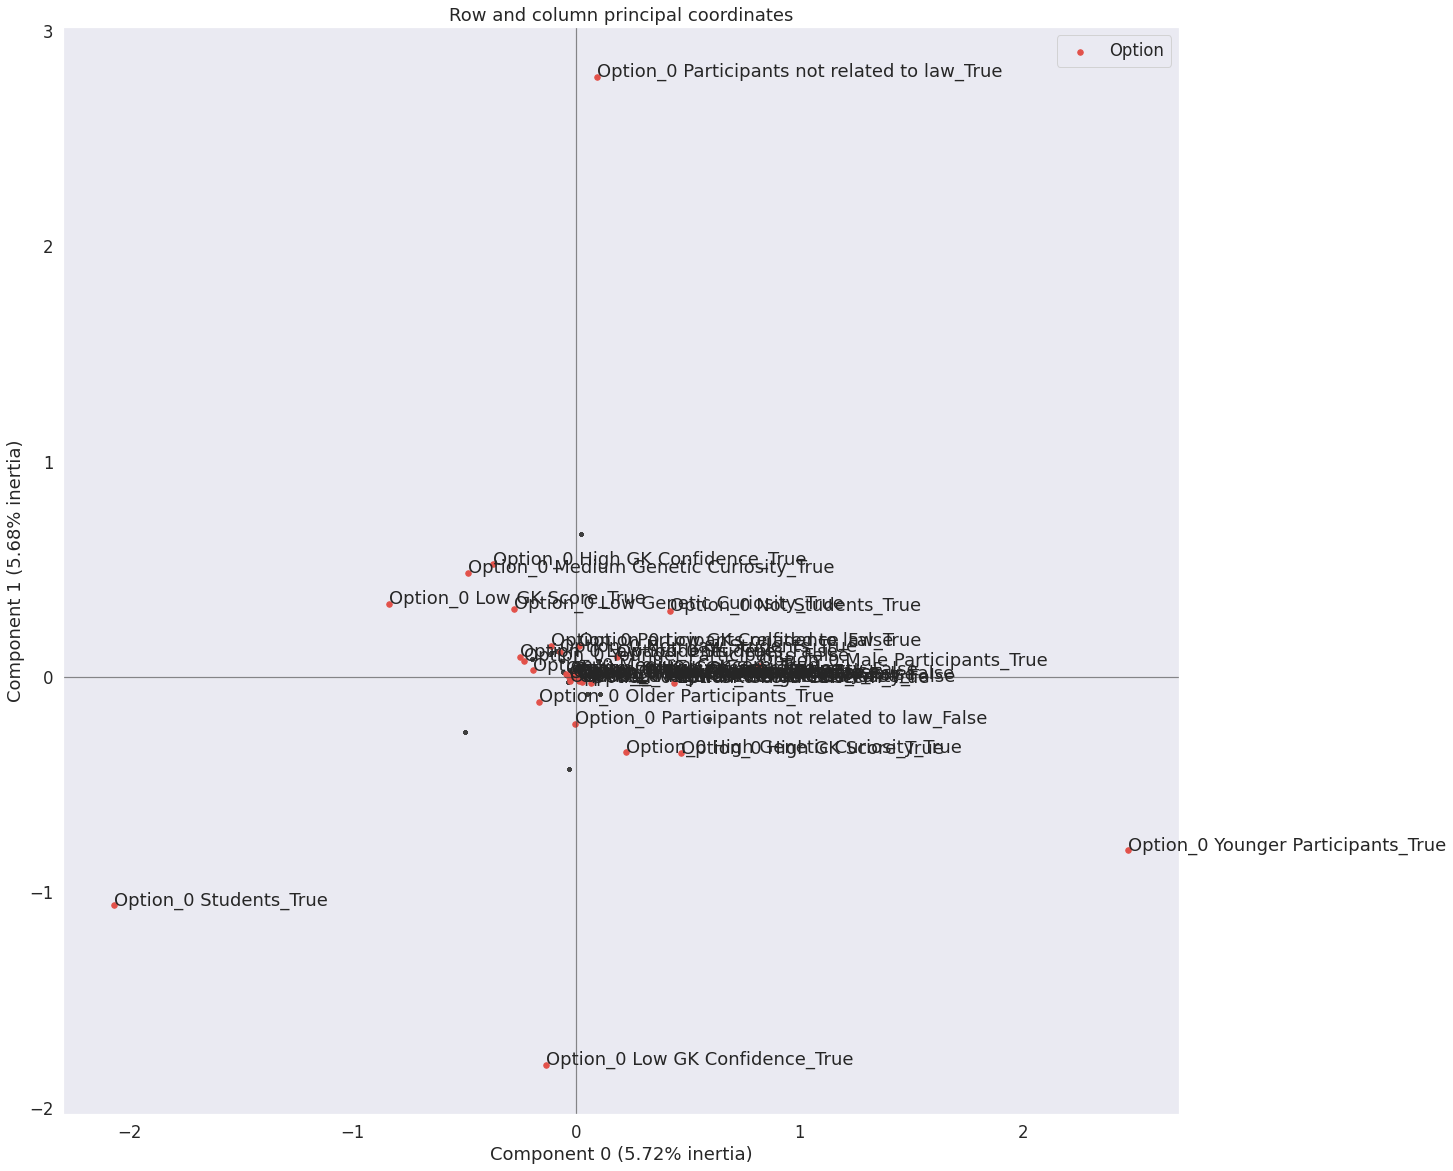

In [156]:
ax = mca.plot_coordinates(newx.iloc[:,2:21],
                     row_points_alpha=1,
                     figsize=(20, 20),
                     show_column_labels=True
                    );

## clusterings

In [157]:
parts = megadf[megadf['Variable'] =='Class_X']
parts

,id,Description,Option,Variable,Group
0,0,GK Score,0 Low GK Score,Class_X,0
1,1,GK Score,0 High GK Score,Class_X,0
2,3,GK Score,0 High GK Score,Class_X,0
3,5,GK Score,0 Low GK Score,Class_X,0
4,14,GK Score,0 Low GK Score,Class_X,0
...,...,...,...,...,...
6952,1875,Genetic Curiosity,0 Low Genetic Curiosity,Class_X,0
6953,1885,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0
6954,1886,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0
6955,1887,Genetic Curiosity,0 Medium Genetic Curiosity,Class_X,0


In [158]:
ndf = parts[['id', 'Option']].copy()
giv = pd.get_dummies(data=ndf, columns=['Option'])
liv = giv.groupby(['id']).sum().reset_index()



In [159]:
import dash_bio
df = liv
df.drop('id', axis=1, inplace=True)  
fig = dash_bio.Clustergram(
    data=df,
    column_labels=list(df.columns.values),
    row_labels=list(df.index),
    height=1080,
    width=720
)
for template in ["plotly_white"]:
    fig.update_layout(template=template)
#fig.write_html(".//all_category_relations.html")


In [160]:
liv.columns

Index(['Option_0 Female Participants', 'Option_0 High Concern',
       'Option_0 High GK Confidence', 'Option_0 High GK Score',
       'Option_0 High Genetic Curiosity', 'Option_0 Law Students',
       'Option_0 Low Concern', 'Option_0 Low GK Confidence',
       'Option_0 Low GK Score', 'Option_0 Low Genetic Curiosity',
       'Option_0 Male Participants', 'Option_0 Medium Concern',
       'Option_0 Medium Genetic Curiosity', 'Option_0 Non Law Students',
       'Option_0 Not Students', 'Option_0 Older Participants',
       'Option_0 Participants not related to law',
       'Option_0 Participants related to law', 'Option_0 Students',
       'Option_0 Younger Participants'],
      dtype='object')

In [161]:
# Keep soft divisions
nliv = liv[['Option_0 High GK Confidence', 'Option_0 Low GK Confidence',
           'Option_0 High GK Score', 'Option_0 Low GK Score', 'Option_0 High Genetic Curiosity', 
            'Option_0 Low Genetic Curiosity',  'Option_0 Medium Concern',
       'Option_0 Medium Genetic Curiosity'
           ]]

In [162]:
import dash_bio
df = nliv
fig = dash_bio.Clustergram(
    data=df,
    column_labels=list(df.columns.values),
    row_labels=list(df.index),
    height=1080,
    width=720
)
for template in ["plotly_white"]:
    fig.update_layout(template=template)
fig.write_html("./select_category_relations.html")


In [163]:
nparts = megadf

ndf = nparts[['id', 'Option']].copy()
giv = pd.get_dummies(data=ndf, columns=['Option'])
liv = giv.groupby(['id']).sum().reset_index()

# Keep soft divisions
nliv = liv[['Option_0 High GK Confidence', 'Option_0 Low GK Confidence',
           'Option_0 High GK Score', 'Option_0 Low GK Score', 'Option_0 High Genetic Curiosity', 
            'Option_0 Low Genetic Curiosity',  'Option_0 Medium Concern',
       'Option_0 Medium Genetic Curiosity'
           ]]

In [164]:
import dash_bio
df = liv
#df.drop('id', axis=1, inplace=True)  
fig = dash_bio.Clustergram(
    data=df,
    column_labels=list(df.columns.values),
    row_labels=list(df.index),
    height=2080,
    width=1500
)
for template in ["plotly_white"]:
    fig.update_layout(template=template)
#fig.write_html("./all_gr_relations.html")


In [165]:
import dash_bio
df = nliv
fig = dash_bio.Clustergram(
    data=df,
    column_labels=list(df.columns.values),
    row_labels=list(df.index),
    height=2080,
    width=1500
)
for template in ["plotly_white"]:
    fig.update_layout(template=template)
fig.write_html("./non_hard_select_all_gr_relations.html")


### Removing groups 8 and 9 about - have participants had genetic testing

In [166]:
select = ['8', '9']
ndf = megadf[~megadf['Group'].isin(select)]
ndf = ndf[['id', 'Option']].copy()
giv = pd.get_dummies(data=ndf, columns=['Option'])
liv = giv.groupby(['id']).sum().reset_index()

# Keep soft divisions
nliv = liv[['Option_0 High GK Confidence', 'Option_0 Low GK Confidence',
           'Option_0 High GK Score', 'Option_0 Low GK Score', 'Option_0 High Genetic Curiosity', 
            'Option_0 Low Genetic Curiosity',  'Option_0 Medium Concern',
       'Option_0 Medium Genetic Curiosity'
           ]]

In [167]:
import dash_bio
df = liv
df.drop('id', axis=1, inplace=True)  
fig = dash_bio.Clustergram(
    data=df,
    column_labels=list(df.columns.values),
    row_labels=list(df.index),
    height=2080,
    width=1500
)
for template in ["plotly_white"]:
    fig.update_layout(template=template)
#fig.write_html("/home/manu10/Downloads/iglas_work/all_gr_relations_minus_8_and_9.html")


In [168]:
import dash_bio
df = nliv
fig = dash_bio.Clustergram(
    data=df,
    column_labels=list(df.columns.values),
    row_labels=list(df.index),
    height=2080,
    width=1500
)
for template in ["plotly_white"]:
    fig.update_layout(template=template)
fig.write_html("./non_hard_select_all_gr_relations_minus_8_and_9.html")


# SANKEY + NETWORK + LONGEST PATH

EON